# **PREDICTION MODEL**

# Data Understanding

In [1]:
# Menghubungkan environment Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Memuat dataset
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/loan_data_2007_2014.csv")

/tmp/ipython-input-3439668969.py:4: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/loan_data_2007_2014.csv")


In [3]:
# Menampilkan lima baris teratas dari data
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Menampilkan informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
# Mengecek jumlah NaN di setiap kolom
null_columns = data.isnull().sum()
null_columns[null_columns > 0]

,0
emp_title,27588
emp_length,21008
annual_inc,4
desc,340304
title,21
delinq_2yrs,29
earliest_cr_line,29
inq_last_6mths,29
mths_since_last_delinq,250351
mths_since_last_record,403647


In [6]:
# Menampilkan statisik deskriptif dari data
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [7]:
# Mengecek duplikasi data
if data['id'].nunique() == data['member_id'].nunique():
    print("Setiap baris mewakili individu yang unik")
else:
    print("Terdapat duplikasi pada data")

Setiap baris mewakili individu yang unik


# Feature Engineering

### Defining Target Variable

In [8]:
# Menghapus kolom yang tidak digunakan

# Mendefinisikan kolom yang akan dihapus
columns_to_drop = [
    'Unnamed: 0',
    'id',
    'member_id',
    'url',
    'desc',
    'zip_code',
    'annual_inc_joint',
    'dti_joint',
    'verification_status_joint',
    'open_acc_6m',
    'open_il_6m',
    'open_il_12m',
    'open_il_24m',
    'mths_since_rcnt_il',
    'total_bal_il',
    'il_util',
    'open_rv_12m',
    'open_rv_24m',
    'max_bal_bc',
    'all_util',
    'inq_fi',
    'total_cu_tl',
    'inq_last_12m',
    'mths_since_last_major_derog',
    'tot_coll_amt',
    'tot_cur_bal',
    'total_rev_hi_lim',
    'sub_grade'
]

# Menghapus kolom dari dataset
data.drop(columns=columns_to_drop, axis=1, inplace=True)

In [9]:
# Menampilkan informasi data setelah penghapusan kolom
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   funded_amnt                 466285 non-null  int64  
 2   funded_amnt_inv             466285 non-null  float64
 3   term                        466285 non-null  object 
 4   int_rate                    466285 non-null  float64
 5   installment                 466285 non-null  float64
 6   grade                       466285 non-null  object 
 7   emp_title                   438697 non-null  object 
 8   emp_length                  445277 non-null  object 
 9   home_ownership              466285 non-null  object 
 10  annual_inc                  466281 non-null  float64
 11  verification_status         466285 non-null  object 
 12  issue_d                     466285 non-null  object 
 13  loan_status   

In [10]:
# Menampilkan statistik deskriptif setelah penghapusan kolom
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,...,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,466285.0,466256.000000
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,...,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,1.0,0.004002
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,...,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,0.0,0.068637
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,...,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,1.0,0.000000
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,...,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,1.0,0.000000
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,...,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,1.0,0.000000
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,1.0,5.000000


In [11]:
# Proporsi nilai pada kolom 'loan_status'
percentage_loan_status = data.loan_status.value_counts(normalize=True) * 100
percentage_loan_status

,proportion
loan_status,
Current,48.087757
Fully Paid,39.619332
Charged Off,9.109236
Late (31-120 days),1.479782
In Grace Period,0.674695
Does not meet the credit policy. Status:Fully Paid,0.426349
Late (16-30 days),0.261214
Default,0.178432
Does not meet the credit policy. Status:Charged Off,0.163205


In [12]:
# Daftar status pembayaran yang dianggap sebagai 'bad_status'
bad_status = [
    'Charged Off',
    'Default',
    'Does not meet the credit policy. Status:Charged Off',
    'Late (31-120 days)'
]

# Membuat kolom target biner 'bad_flag' (1 = bad, 0 = good)
data['bad_flag'] = data['loan_status'].isin(bad_status).astype(int)

In [13]:
# Menghitung persentase distribusi nilai dalam kolom 'bad_flag'
percentage_bad_flag = data['bad_flag'].value_counts(normalize=True) * 100
percentage_bad_flag

,proportion
bad_flag,
0,89.069346
1,10.930654


In [14]:
# Menghapus kolom 'loan_status'
data.drop('loan_status', axis=1, inplace=True)

### Data Cleaning

##### Column: emp_length

In [15]:
# Menampilkan nilai unik dari kolom 'emp_length'
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [16]:
# Membersihkan dan mengubah tipe data menjadi numerik
data['emp_length_int'] = pd.to_numeric(data['emp_length'].str.replace(r'\D', '', regex=True), errors='coerce')

In [17]:
# Menampilkan lima baris teratas dari kolom 'emp_length_int'
data['emp_length_int'].head()

,emp_length_int
0,10.0
1,1.0
2,10.0
3,10.0
4,1.0


In [18]:
# Menghapus kolom 'emp_length'
data.drop('emp_length', axis=1, inplace=True)

##### Column: term

In [19]:
# Menampilkan nilai unik dari kolom 'term'
unique_terms = data['term'].unique()
unique_terms

array([' 36 months', ' 60 months'], dtype=object)

In [20]:
# Membersihkan dan mengubah tipe data menjadi numerik
data['term_int'] = data['term'].str.replace(' months', '').astype(int)

In [21]:
# Menampilkan lima baris teratas dari kolom 'term_int'
data['term_int'].head()

,term_int
0,36
1,60
2,36
3,36
4,60


In [22]:
# Menghapus kolom 'term'
data.drop('term', axis=1, inplace=True)

##### Column: earlist_cr_line

In [23]:
# Menampilkan lima baris teratas dari kolom 'earliest_cr_line'
data['earliest_cr_line'].head()

,earliest_cr_line
0,Jan-85
1,Apr-99
2,Nov-01
3,Feb-96
4,Jan-96


In [24]:
# Mengubah kolom 'earliest_cr_line' menjadi format tanggal
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line'], format = '%b-%y')

In [25]:
# Menampilkan lima baris teratas dari kolom 'earliest_cr_line_date'
data['earliest_cr_line_date'].head()

,earliest_cr_line_date
0,1985-01-01
1,1999-04-01
2,2001-11-01
3,1996-02-01
4,1996-01-01


In [26]:
# Menghitung jumlah bulan sejak 'earliest_cr_line' hingga tanggal referensi
data['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']).dt.days / 30.5)
data['mths_since_earliest_cr_line'].head()

,mths_since_earliest_cr_line
0,394.0
1,224.0
2,193.0
3,261.0
4,262.0


In [27]:
# Menampilkan statistik deskriptif dari kolom 'mths_since_earliest_cr_line'
data['mths_since_earliest_cr_line'].describe()

,mths_since_earliest_cr_line
count,466256.000000
mean,239.081146
std,93.597444
min,-611.000000
25%,183.000000
50%,225.000000
75%,284.000000
max,586.000000


In [28]:
# Menampilkan baris dengan nilai 'mths_since_earliest_cr_line' yang kurang dari 0
data[data['mths_since_earliest_cr_line'] < 0][['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']].head()

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-536.0
1770,Sep-68,2068-09-01,-608.0
2799,Sep-64,2064-09-01,-560.0
3282,Sep-67,2067-09-01,-596.0
3359,Feb-65,2065-02-01,-565.0


In [29]:
# Mengganti nilai 'mths_since_earliest_cr_line' yang bernilai kurang dari 0 dengan nilai maksimum
data.loc[data['mths_since_earliest_cr_line'] < 0, 'mths_since_earliest_cr_line'] = data['mths_since_earliest_cr_line'].max()

In [30]:
# Menghapus kolom 'earliest_cr_line' dan 'earliest_cr_line_date'
data.drop(['earliest_cr_line', 'earliest_cr_line_date'], axis=1, inplace=True)

##### Column: issue_d

In [31]:
# Mengubah kolom 'issue_d' menjadi format tanggal
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format = '%b-%y')

In [32]:
# Menghitung jumlah bulan sejak 'issue_d' hingga tanggal referensi
data['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - data['issue_d_date']).dt.days / 30.5)

In [33]:
# Menampilkan lima baris teratas dari kolom 'mths_since_issue_d'
data['mths_since_issue_d'].head()

,mths_since_issue_d
0,72.0
1,72.0
2,72.0
3,72.0
4,72.0


In [34]:
# Menampilkan statistik deskriptif dari kolom 'mths_since_issue_d'
data['mths_since_issue_d'].describe()

,mths_since_issue_d
count,466285.000000
mean,51.255187
std,14.340154
min,36.000000
25%,41.000000
50%,47.000000
75%,57.000000
max,126.000000


In [35]:
# Menghapus kolom 'issue_d' dan 'issue_d_date'
data.drop(['issue_d', 'issue_d_date'], axis=1, inplace=True)

##### Column: last_pymnt_d

In [36]:
# Mengubah kolom 'last_pymnt_d_date' menjadi format tanggal
data['last_pymnt_d_date'] = pd.to_datetime(data['last_pymnt_d'], format = '%b-%y')

In [37]:
# Menghitung jumlah bulan sejak 'last_pymnt_d' hinggal tanggal referensi
data['mths_since_last_pymnt_d'] = round((pd.to_datetime('2017-12-01') - data['last_pymnt_d_date']).dt.days / 30.5)

In [38]:
# Menampilkan lima baris teratas dari kolom 'mths_since_last_pymnt_d'
data['mths_since_last_pymnt_d'].head()

,mths_since_last_pymnt_d
0,35.0
1,56.0
2,42.0
3,35.0
4,23.0


In [39]:
# Menampilkan statistik deskriptif dari kolom 'mths_since_last_pymnt_d'
data['mths_since_last_pymnt_d'].describe()

,mths_since_last_pymnt_d
count,465909.000000
mean,31.294369
std,12.809898
min,23.000000
25%,23.000000
50%,24.000000
75%,35.000000
max,120.000000


In [40]:
# Menghapus kolom 'last_pymnt_d' dan 'last_pymnt_d_date'
data.drop(['last_pymnt_d', 'last_pymnt_d_date'], axis=1, inplace=True)

##### Column: next_pymnt_d

In [41]:
# Mengubah kolom 'next_pymnt_d' menjadi format tanggal
data['next_pymnt_d_date'] = pd.to_datetime(data['next_pymnt_d'], format = '%b-%y')

In [42]:
# Menghitung jumlah bulan sejak 'next_pymnt_d' hingga tanggal referensi
data['mths_since_next_pymnt_d'] = round((pd.to_datetime('2017-12-01') - data['next_pymnt_d_date']).dt.days / 30.5)

In [43]:
# Menampilkan lima baris teratas dari kolom 'mths_since_next_pymnt_d'
data['mths_since_next_pymnt_d'].head()

,mths_since_next_pymnt_d
0,NaN
1,NaN
2,NaN
3,NaN
4,22.0


In [44]:
# Menampilkan statistik deskriptif dari kolom 'mths_since_next_pymnt_d'
data['mths_since_next_pymnt_d'].describe()

,mths_since_next_pymnt_d
count,239071.000000
mean,22.738136
std,6.082298
min,21.000000
25%,22.000000
50%,22.000000
75%,22.000000
max,120.000000


In [45]:
# Menghapus kolom 'next_pymnt_d' dan 'next_pymnt_d_date'
data.drop(['next_pymnt_d', 'next_pymnt_d_date'], axis=1, inplace=True)

##### Column: last_credit_pull_d

In [46]:
# Mengubah kolom 'last_credit_pull_d_date' menjadi format tanggal
data['last_credit_pull_d_date'] = pd.to_datetime(data['last_credit_pull_d'], format = '%b-%y')

In [47]:
# Menghitung jumlah bulan sejak 'last_credit_pull_d' hingga tanggal referensi
data['mths_since_last_credit_pull_d'] = round((pd.to_datetime('2017-12-01') - data['last_credit_pull_d_date']).dt.days / 30.5)

In [48]:
# Menampilkan lima baris teratas dari kolom 'mths_since_last_credit_pull_d'
data['mths_since_last_credit_pull_d'].head()

,mths_since_last_credit_pull_d
0,23.0
1,51.0
2,23.0
3,35.0
4,23.0


In [49]:
# Menampilkan statistik deskriptif dari kolom 'mths_since_last_credit_pull_d'
data['mths_since_last_credit_pull_d'].describe()

,mths_since_last_credit_pull_d
count,466243.000000
mean,27.045588
std,9.636423
min,23.000000
25%,23.000000
50%,23.000000
75%,25.000000
max,127.000000


In [50]:
# Menghapus kolom 'last_credit_pull_d' dan 'last_credit_pull_d_date'
data.drop(['last_credit_pull_d', 'last_credit_pull_d_date'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

### Check correlation

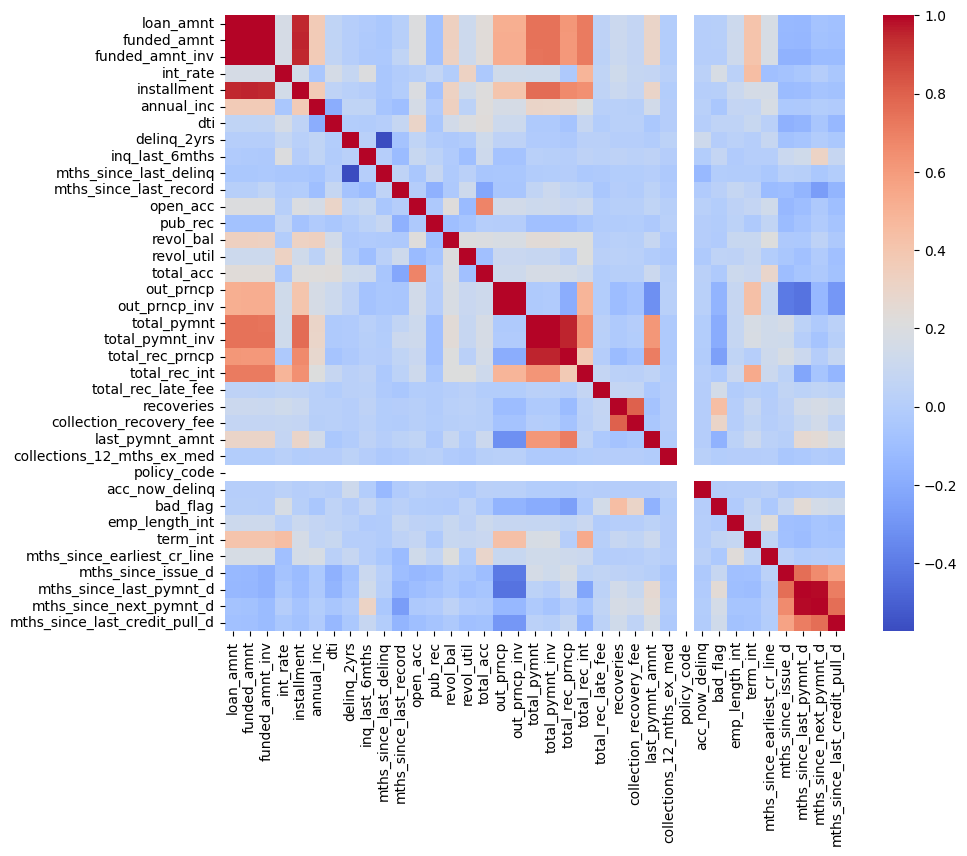

In [51]:
# Membuat heatmap untuk melihat hubungan korelasi antar variabel numerik

import seaborn as sns
import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include=[float, int])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', cbar=True)
plt.show()

### Check Cardinality Data

##### Categorical Data

In [52]:
# Menampilkan jumlah nilai unik dari fitur-fitur dengan tipe data objek
data.select_dtypes(include='object').nunique()

,0
grade,7
emp_title,205475
home_ownership,6
verification_status,3
pymnt_plan,2
purpose,14
title,63098
addr_state,50
initial_list_status,2
application_type,1


In [53]:
# Menghapus kolom 'emp_title', 'title', dan 'application_type'
data.drop(['emp_title', 'title', 'application_type'], axis=1, inplace=True)

##### Numerical Data

In [54]:
# Menampilkan jumlah nilai unik dari fitur-fitur dengan tipe data non-objek
data.select_dtypes(exclude='object').nunique()

,0
loan_amnt,1352
funded_amnt,1354
funded_amnt_inv,9854
int_rate,506
installment,55622
annual_inc,31901
dti,3997
delinq_2yrs,24
inq_last_6mths,28
mths_since_last_delinq,145


In [55]:
# Menghapus kolom 'policy_code'
data.drop(['policy_code'], axis=1, inplace=True)

In [56]:
# Menampilkan persentase distribusi untuk setiap nilai unik di semua kolom kategorikal (object)
for column in data.select_dtypes(include='object').columns:
    print(f"Distribusi nilai unik pada kolom: {column}")
    distribution = data[column].value_counts(normalize=True) * 100
    print(distribution, end='\n\n')

Distribusi nilai unik pada kolom: grade
grade
B    29.365946
C    26.870476
D    16.489486
A    16.056060
E     7.668486
F     2.837106
G     0.712440
Name: proportion, dtype: float64

Distribusi nilai unik pada kolom: home_ownership
home_ownership
MORTGAGE    50.586015
RENT        40.420129
OWN          8.943886
OTHER        0.039032
NONE         0.010723
ANY          0.000214
Name: proportion, dtype: float64

Distribusi nilai unik pada kolom: verification_status
verification_status
Verified           36.041262
Source Verified    32.167666
Not Verified       31.791072
Name: proportion, dtype: float64

Distribusi nilai unik pada kolom: pymnt_plan
pymnt_plan
n    99.99807
y     0.00193
Name: proportion, dtype: float64

Distribusi nilai unik pada kolom: purpose
purpose
debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.15744

In [57]:
# Menghapus kolom 'pymnt_plan'
data.drop('pymnt_plan', axis=1, inplace=True)

### Univariate Analysis

##### Categorical Data

In [58]:
# Mengidentifikasi dan menyimpan nama-nama kolom kategorikal
cat_var = data.select_dtypes(include=["object"]).columns
cat_var

Index(['grade', 'home_ownership', 'verification_status', 'purpose',
       'addr_state', 'initial_list_status'],
      dtype='object')

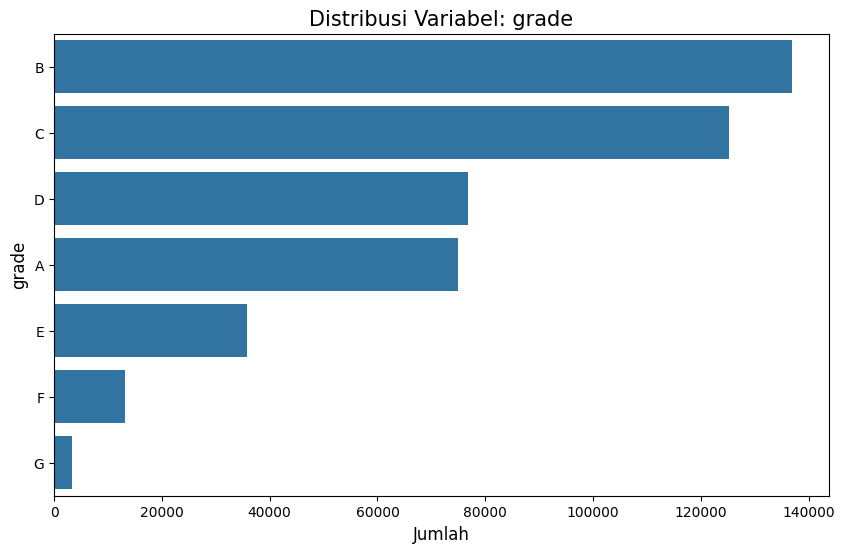

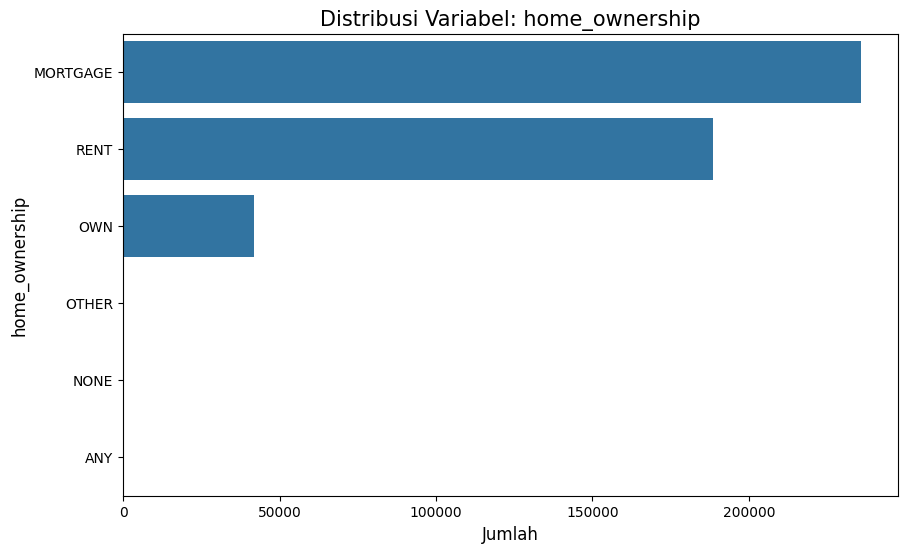

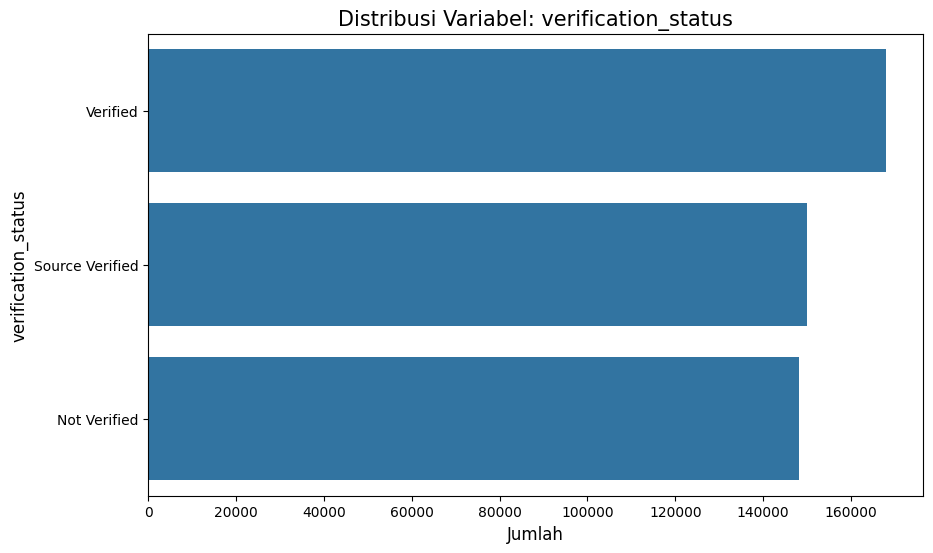

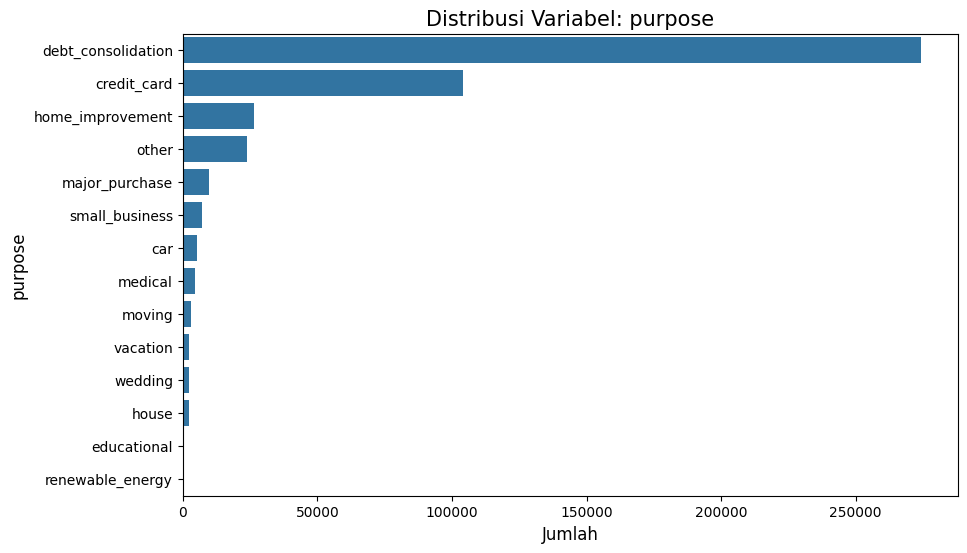

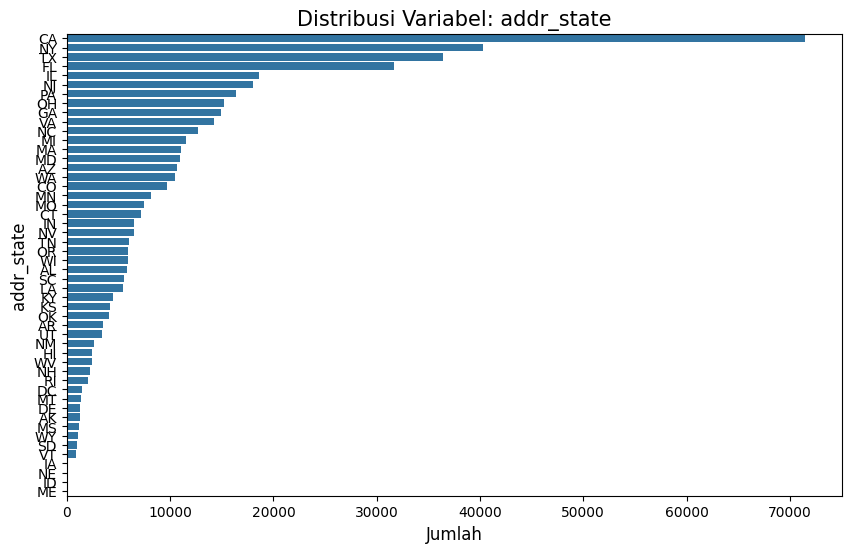

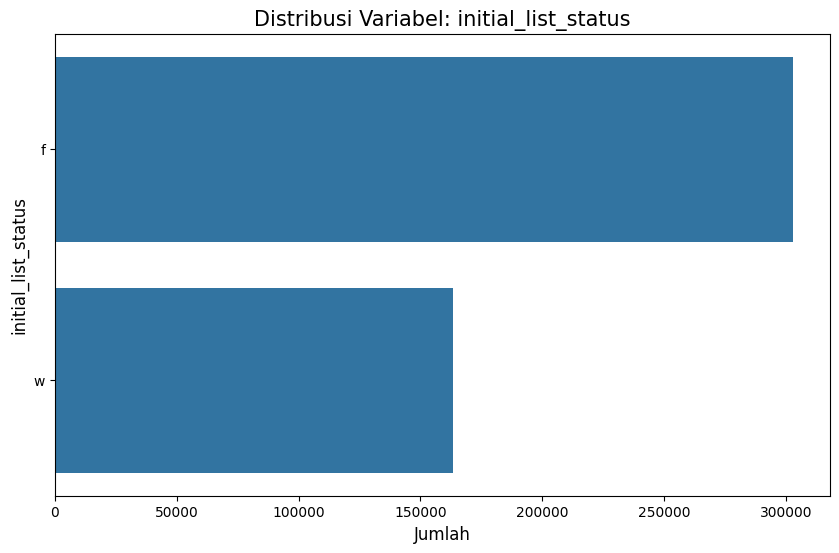

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop melalui setiap nama kolom di dalam list cat_var
for column in cat_var:
    plt.figure(figsize=(10, 6))

    sns.countplot(data=data, y=column, order=data[column].value_counts().index)

    plt.title(f'Distribusi Variabel: {column}', fontsize=15)
    plt.xlabel('Jumlah', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.show()

##### Numerical Data

In [60]:
# Mengidentifikasi dan menyimpan nama-nama kolom numerik
num_var = data.select_dtypes(exclude='object').columns
num_var

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'bad_flag',
       'emp_length_int', 'term_int', 'mths_since_earliest_cr_line',
       'mths_since_issue_d', 'mths_since_last_pymnt_d',
       'mths_since_next_pymnt_d', 'mths_since_last_credit_pull_d'],
      dtype='object')

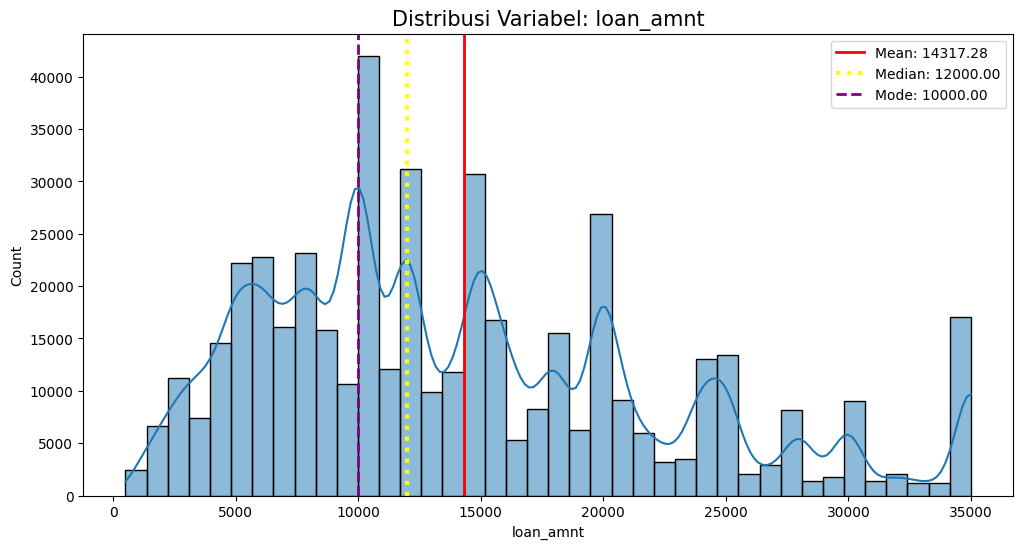

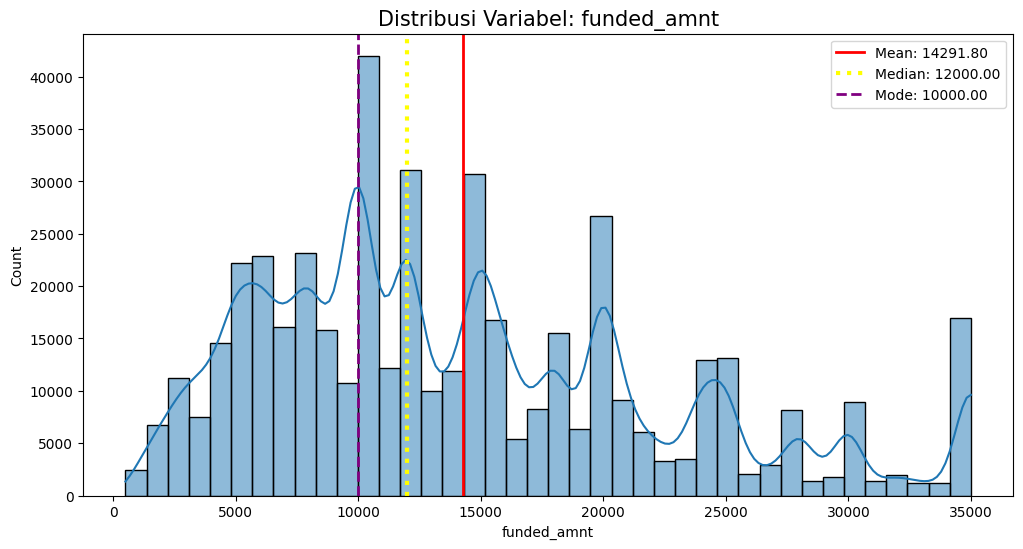

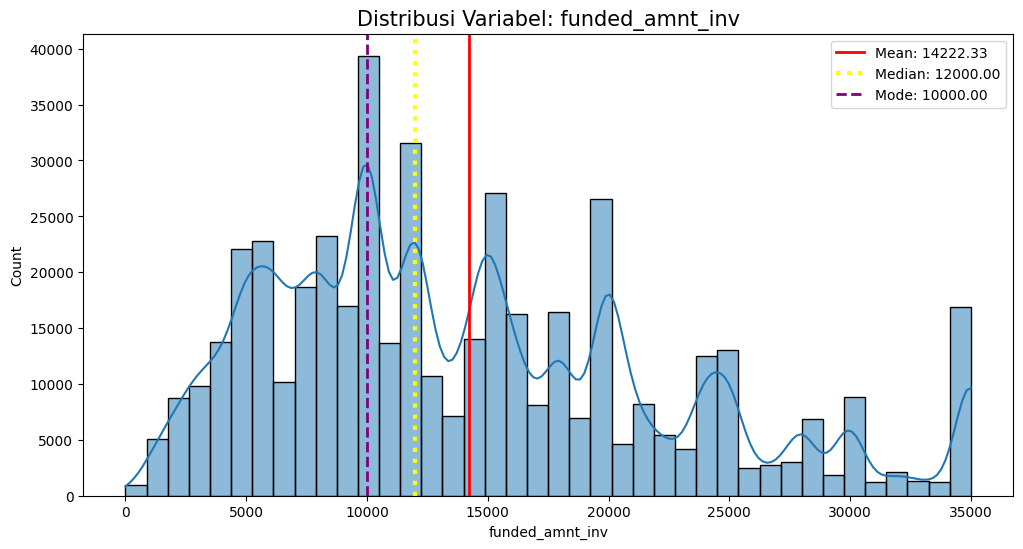

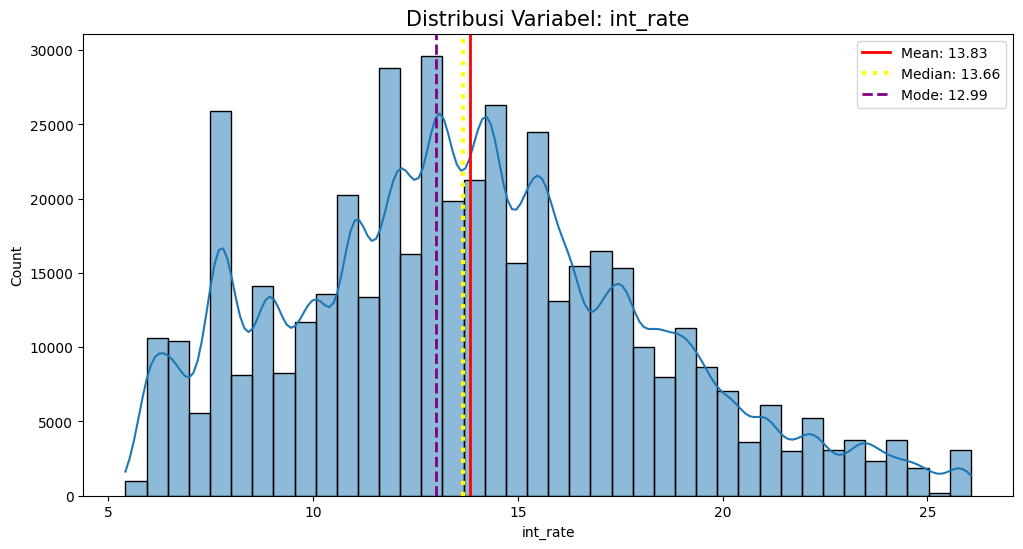

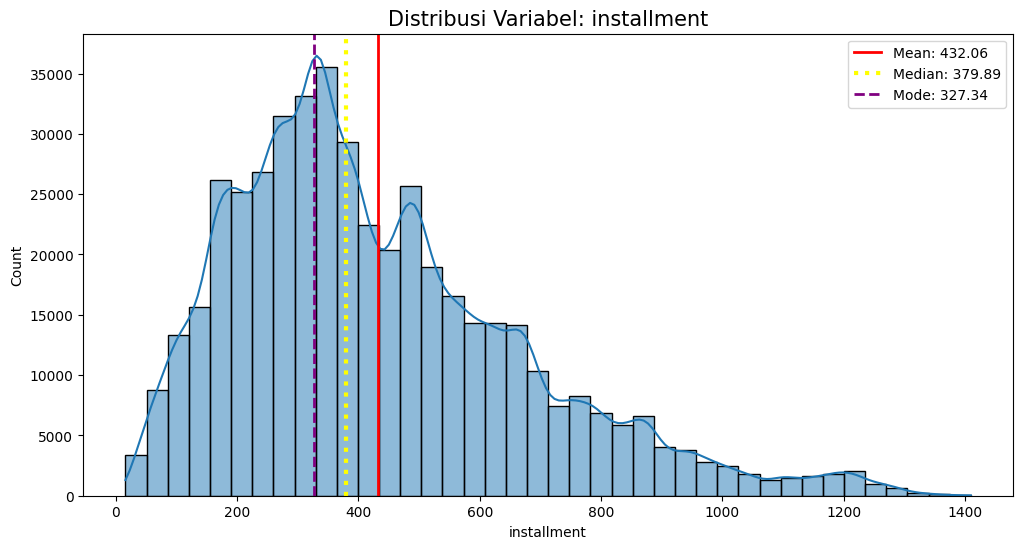

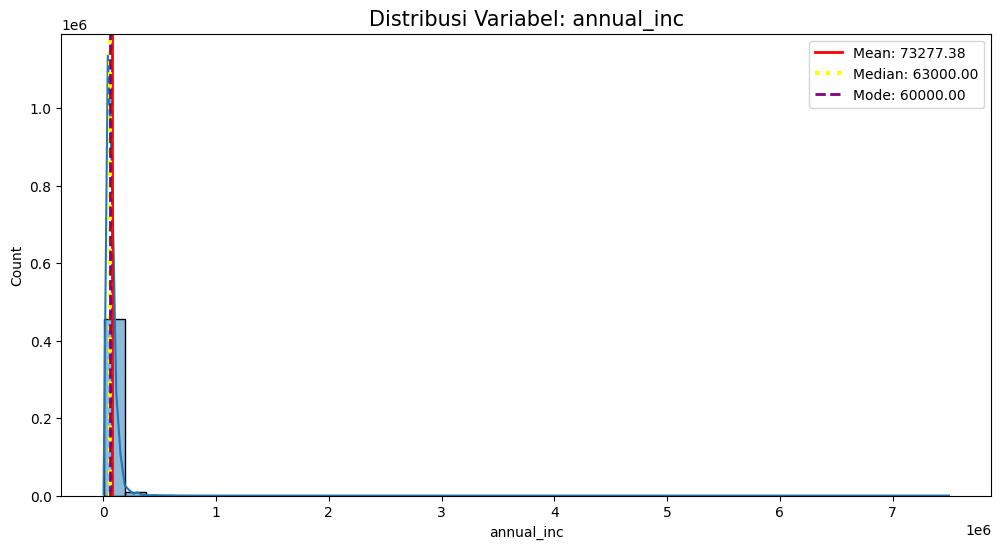

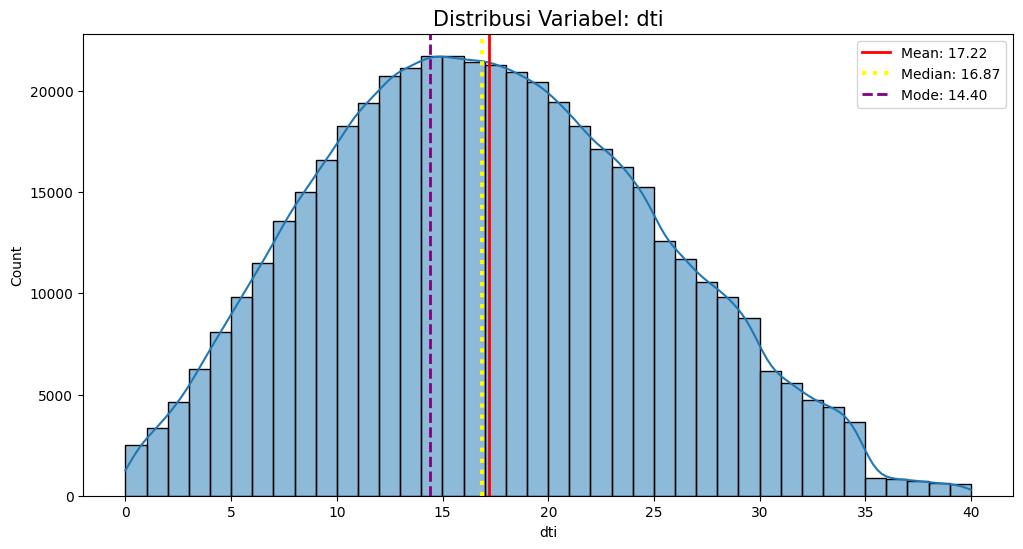

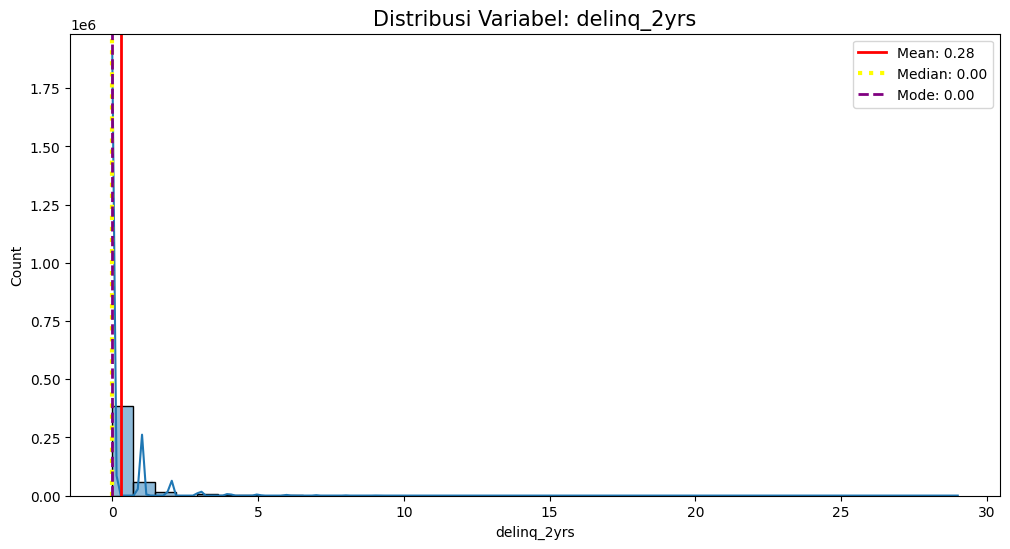

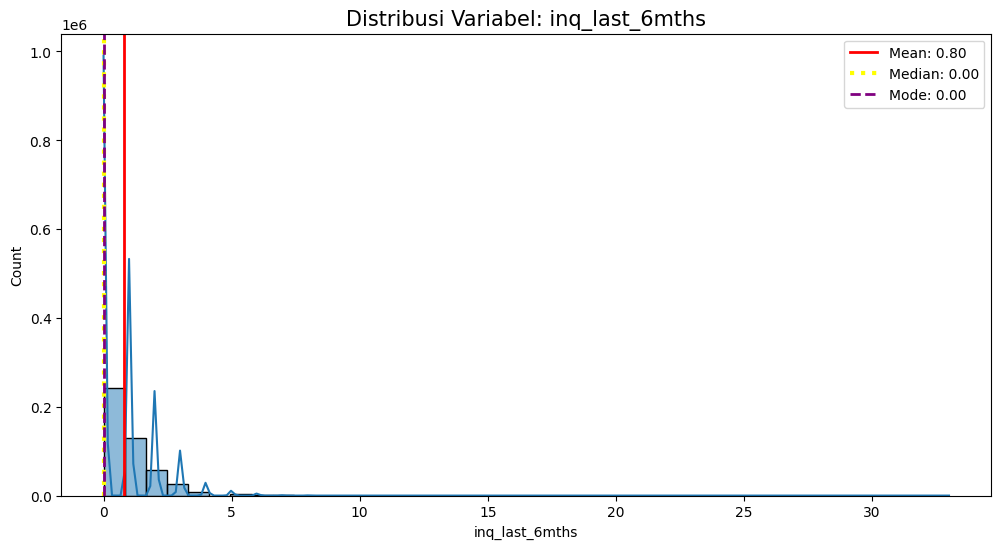

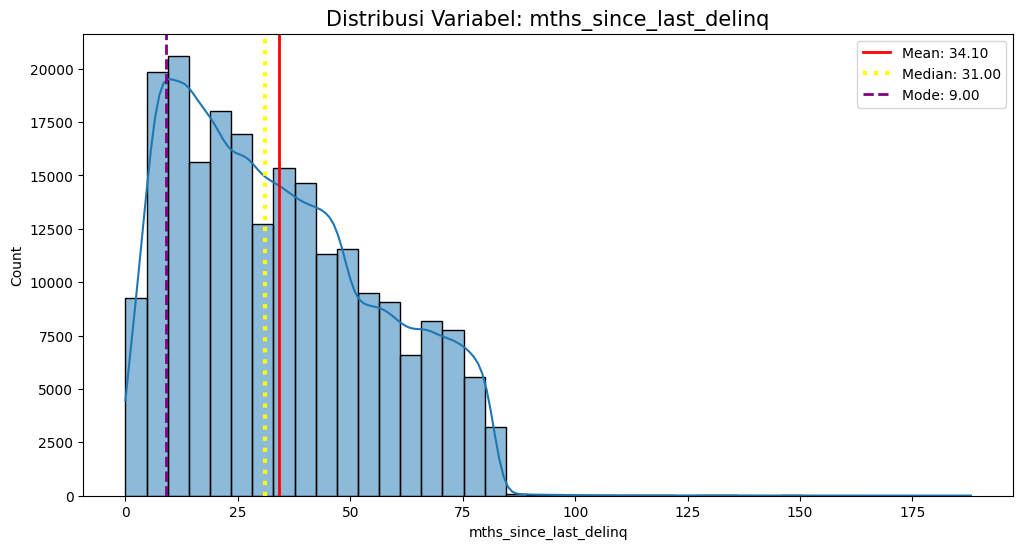

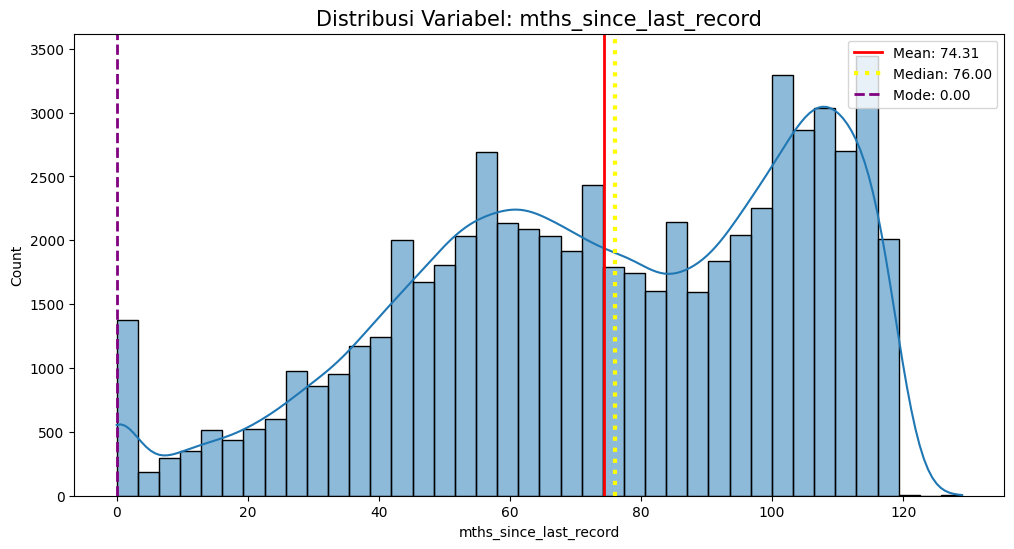

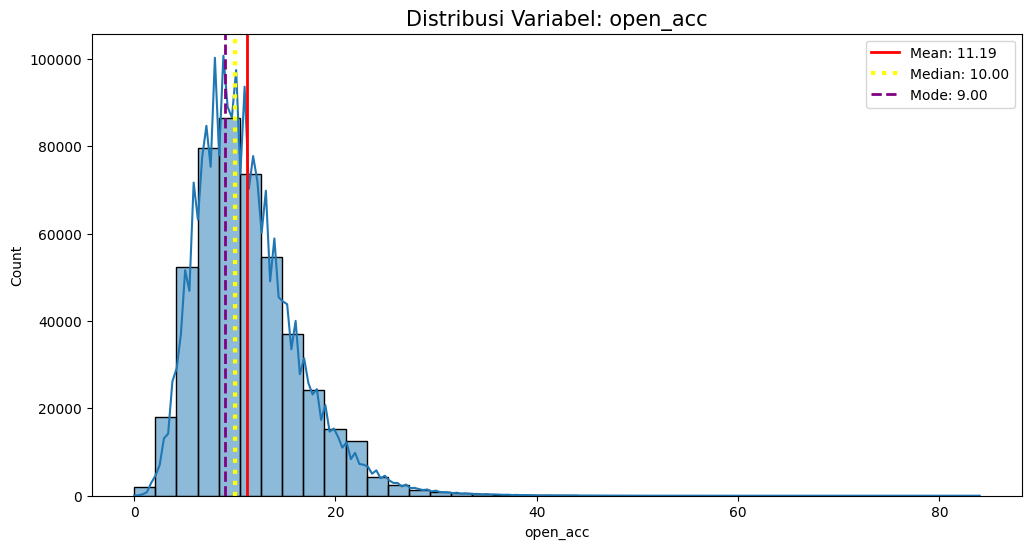

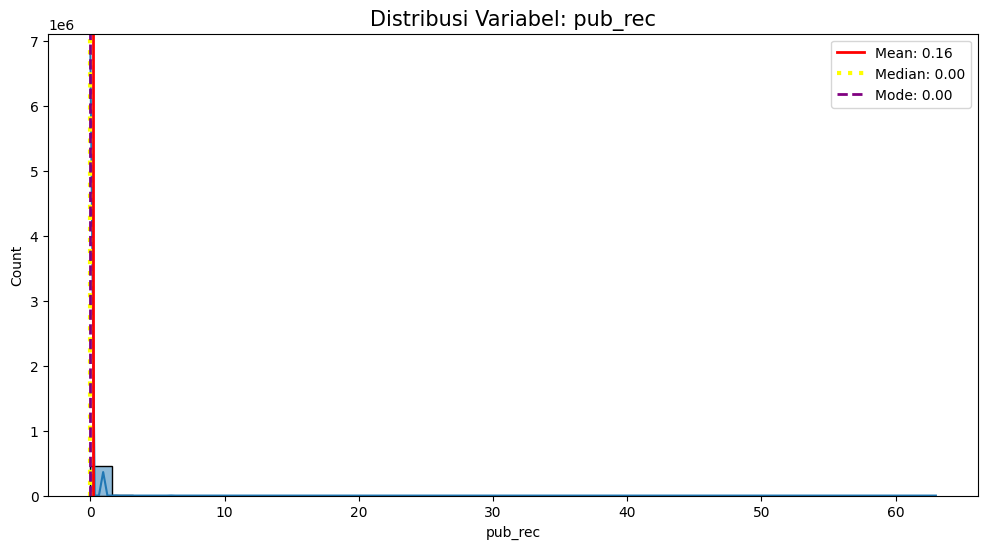

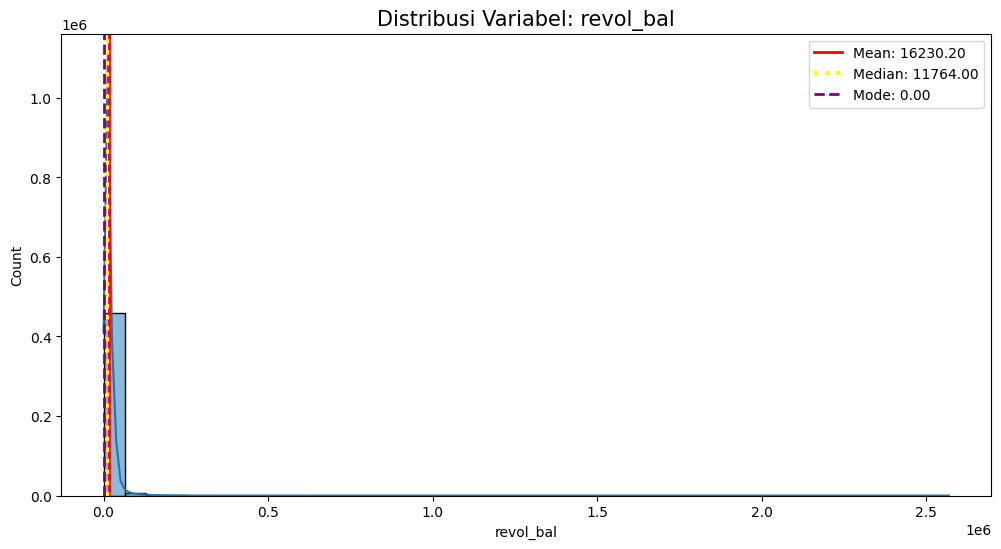

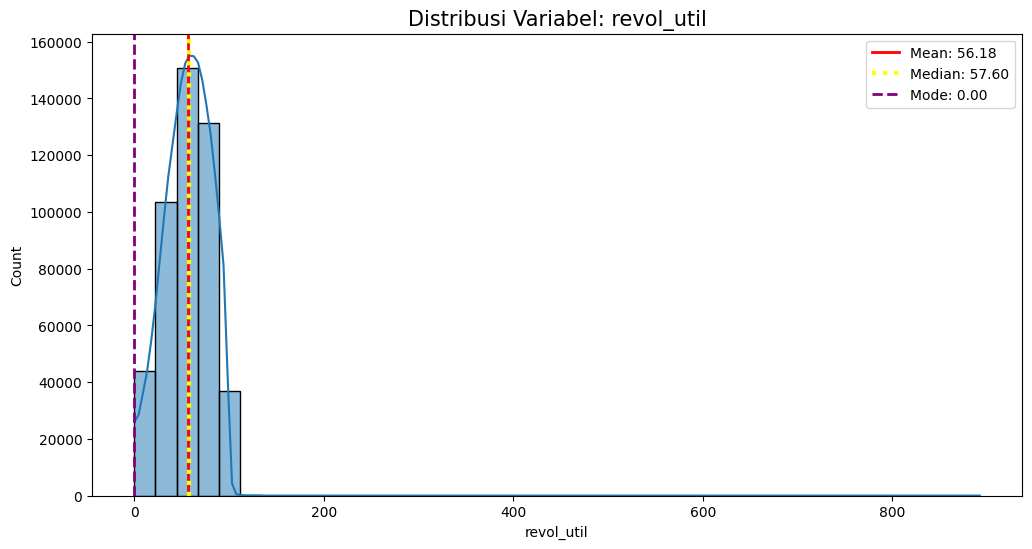

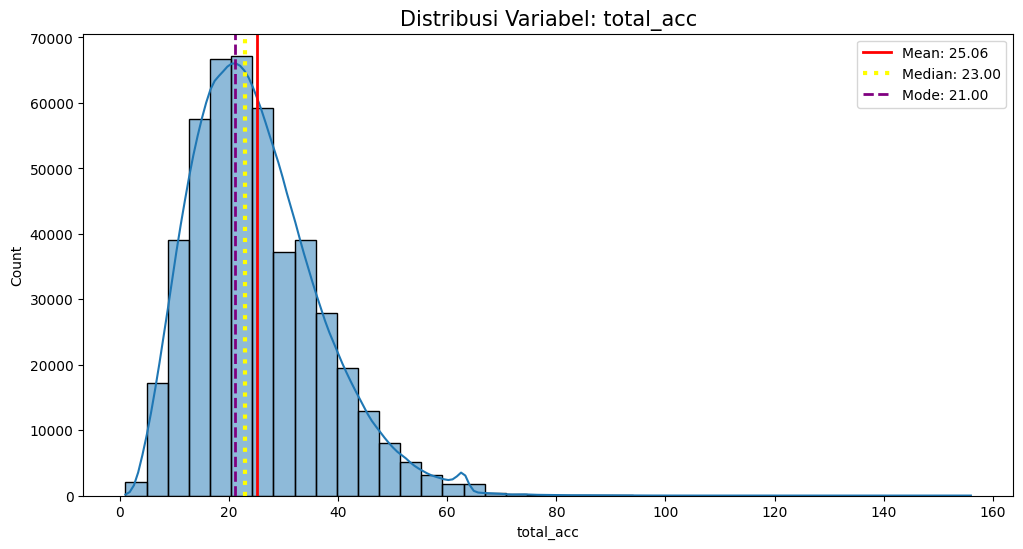

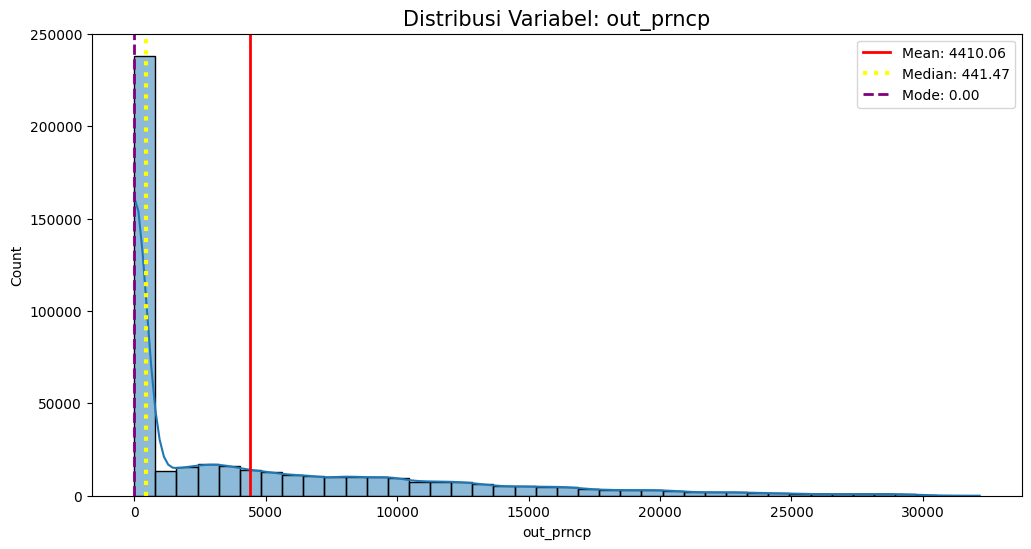

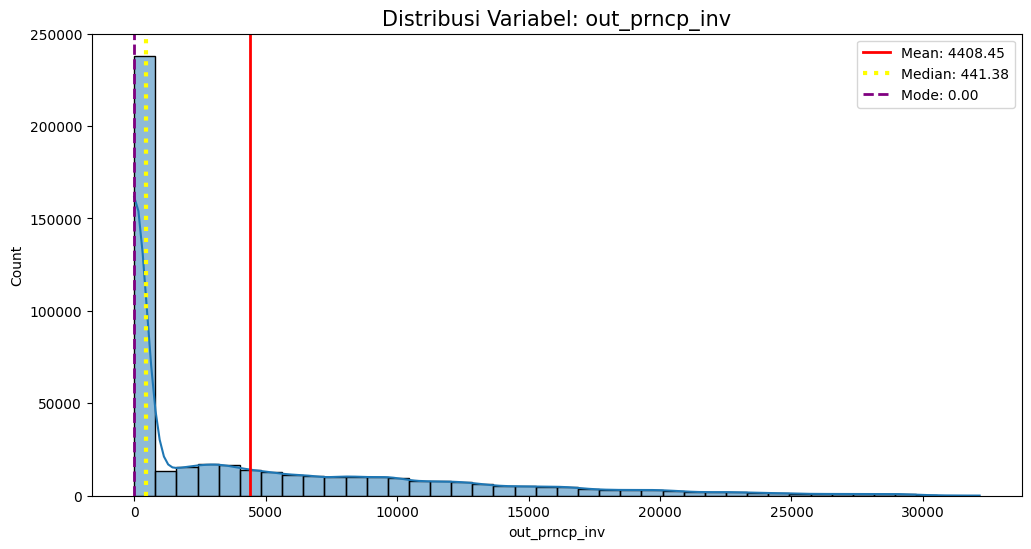

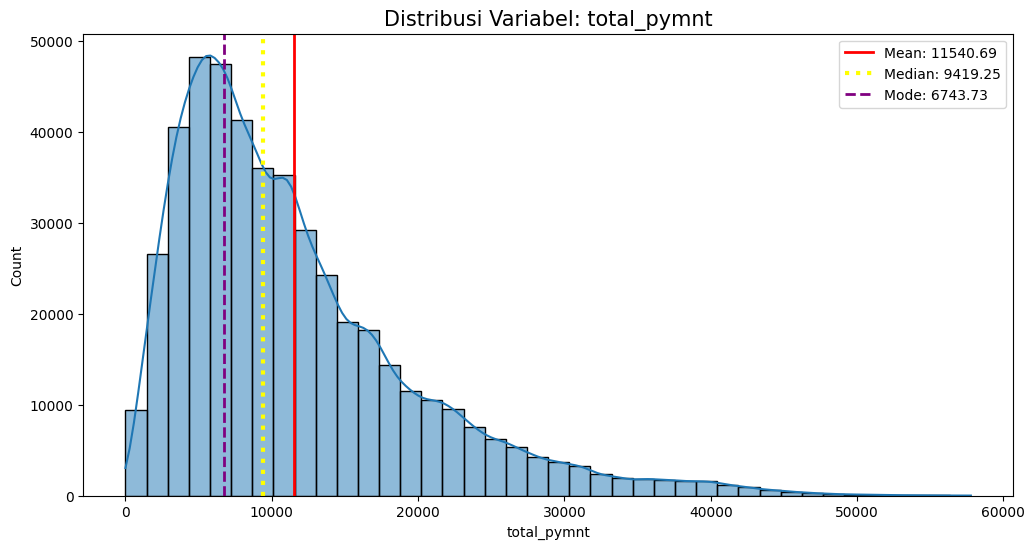

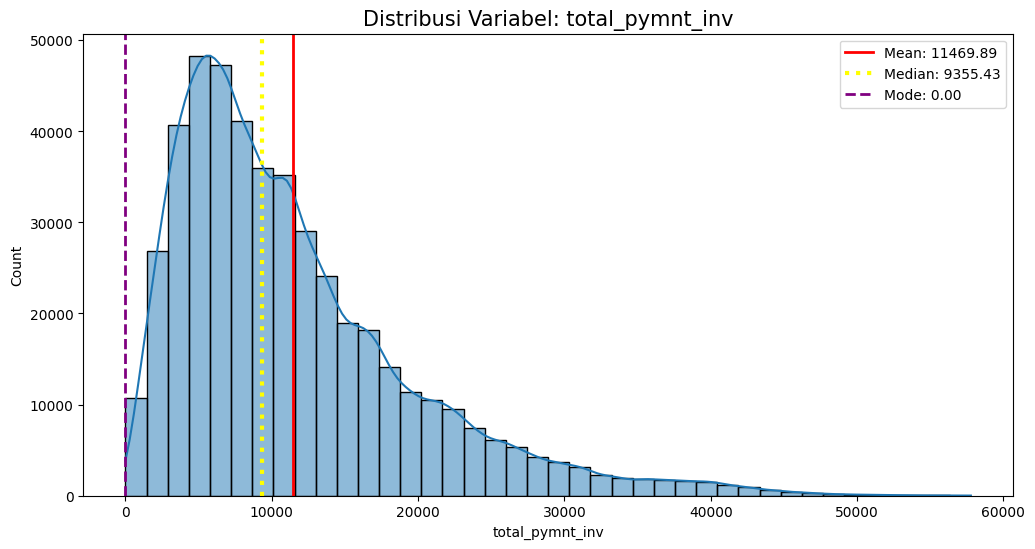

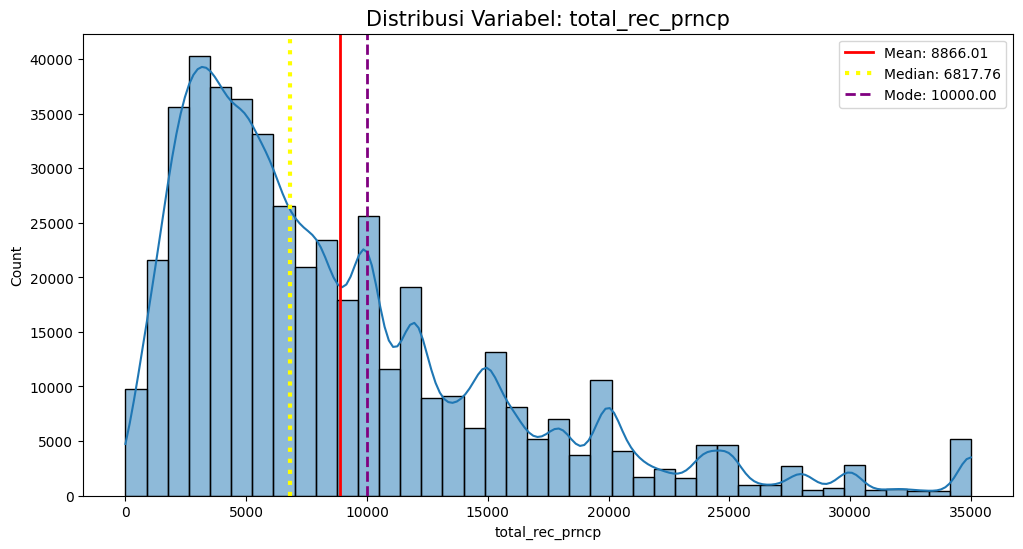

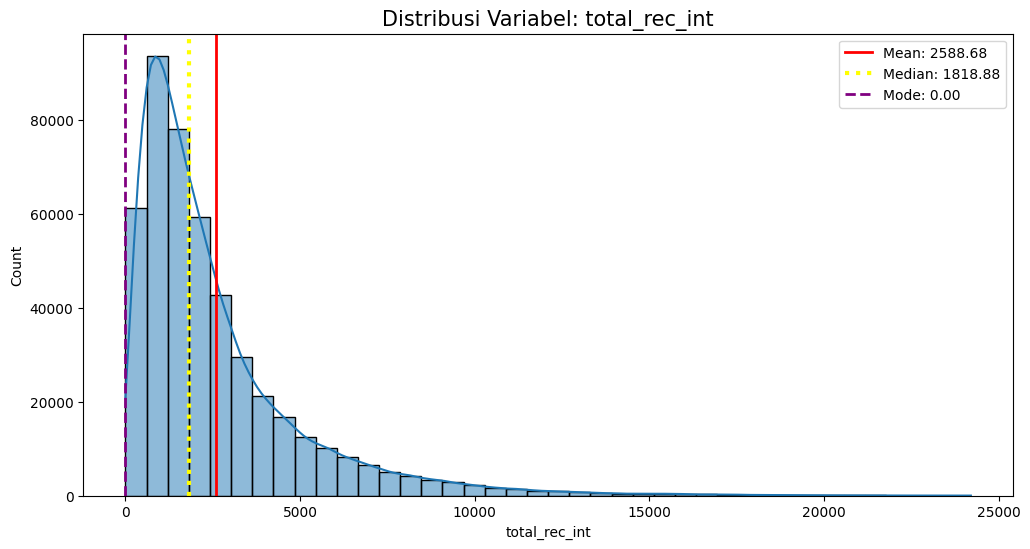

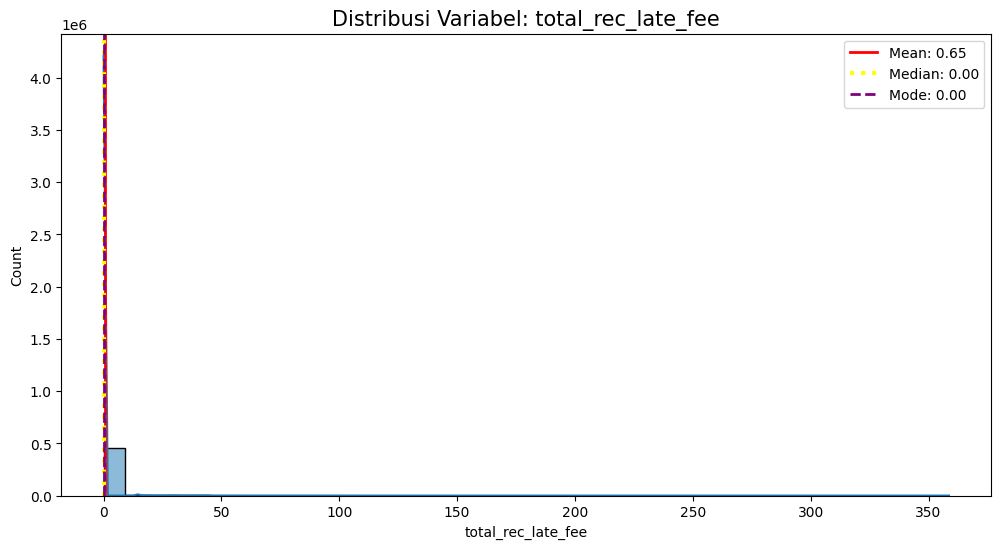

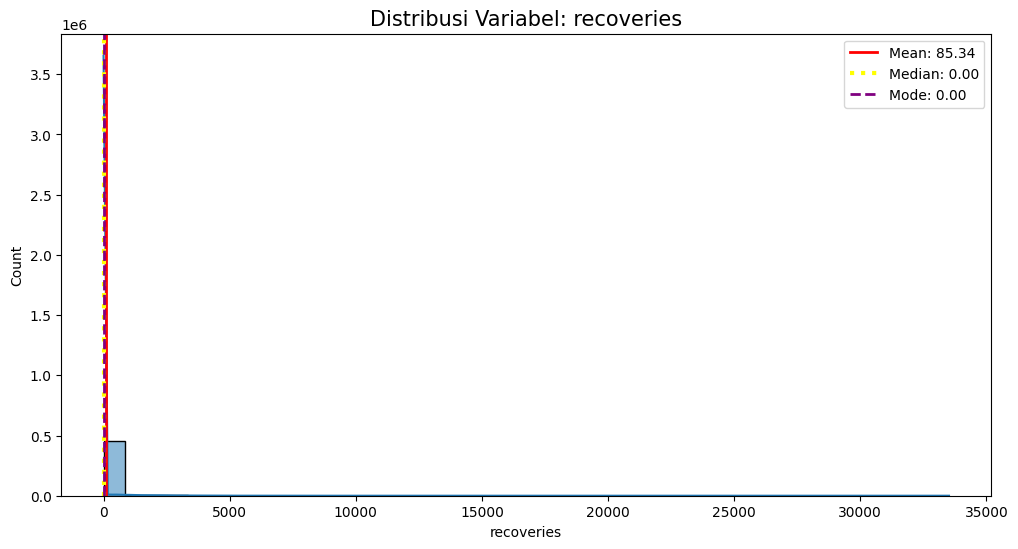

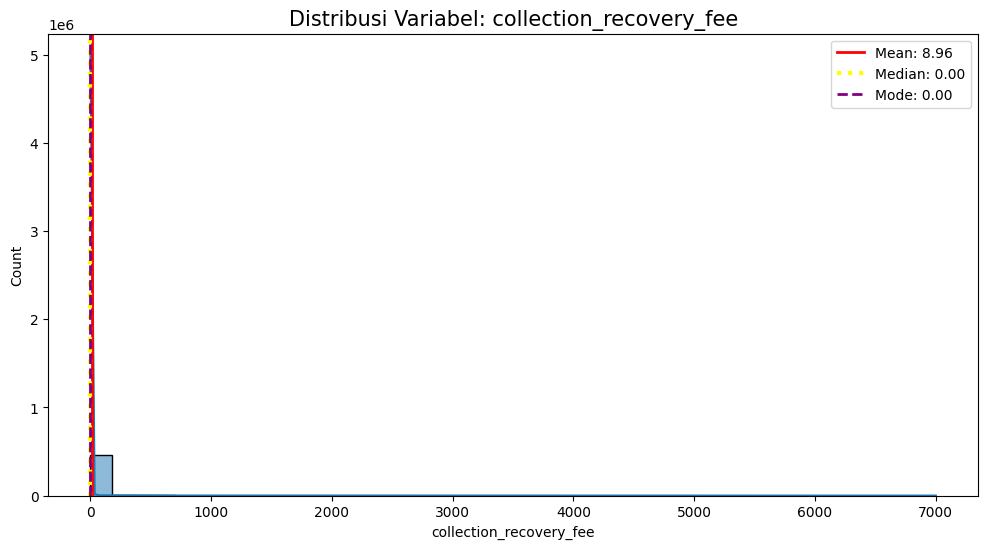

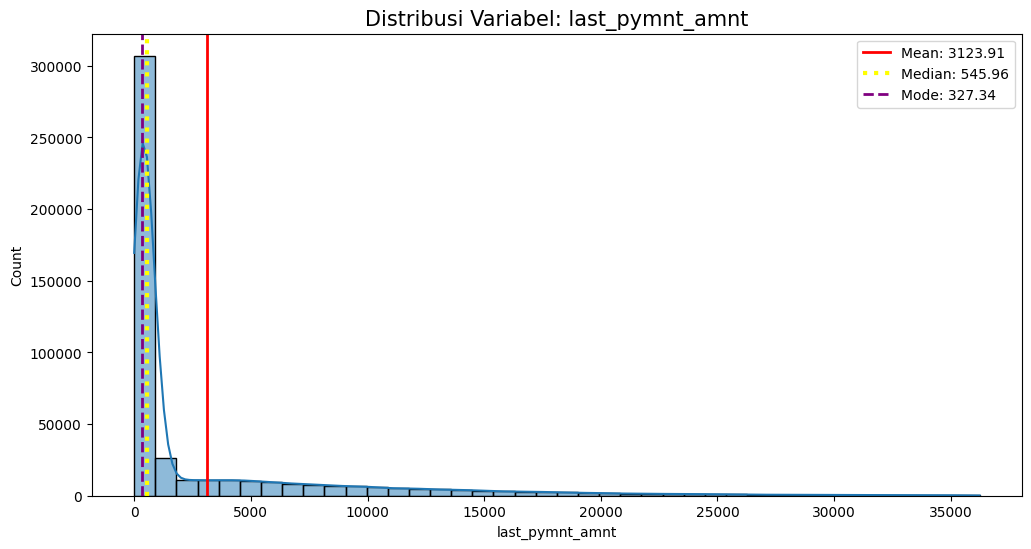

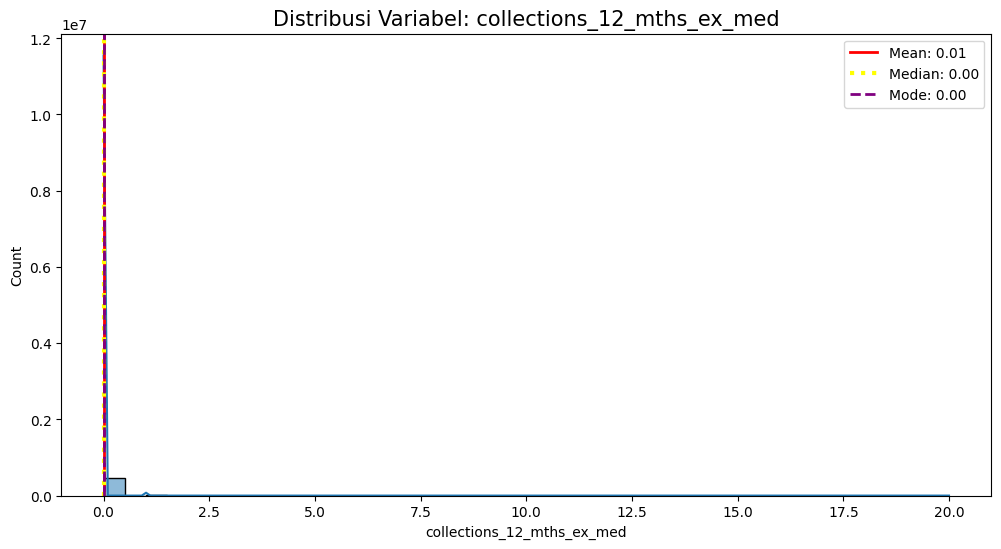

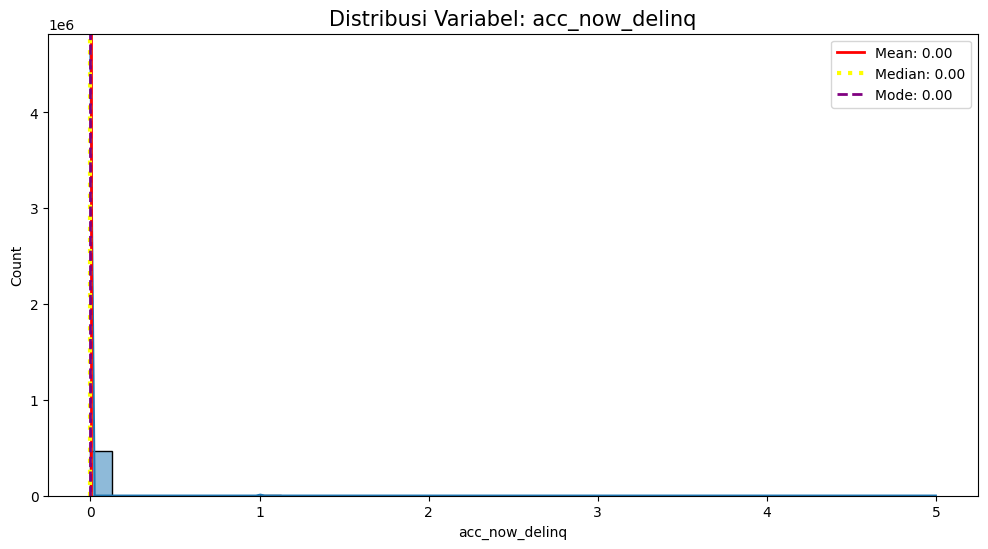

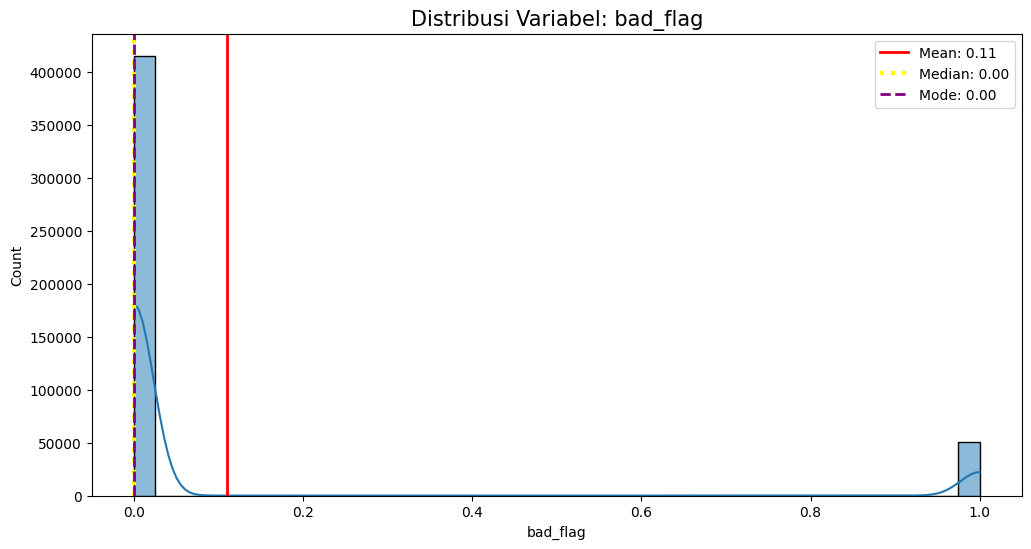

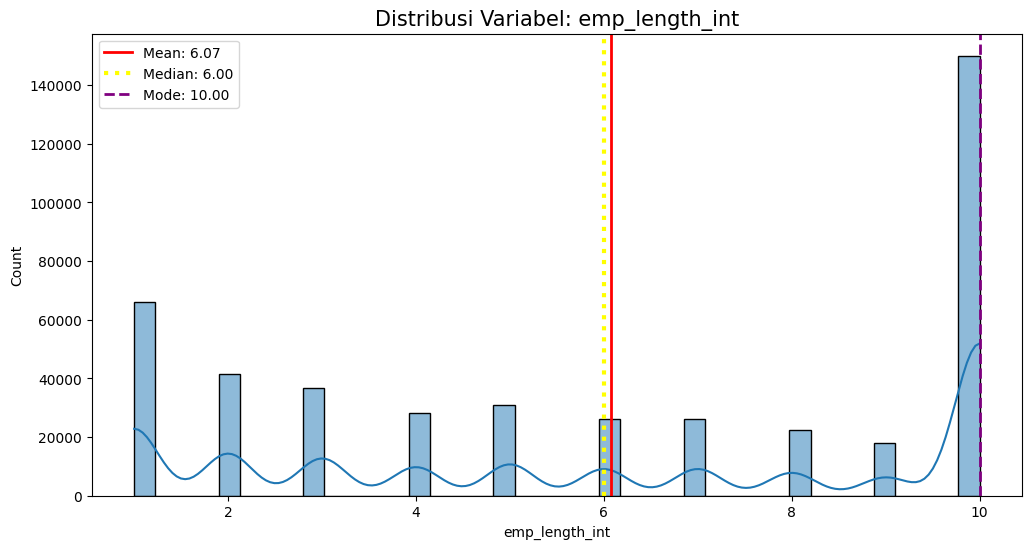

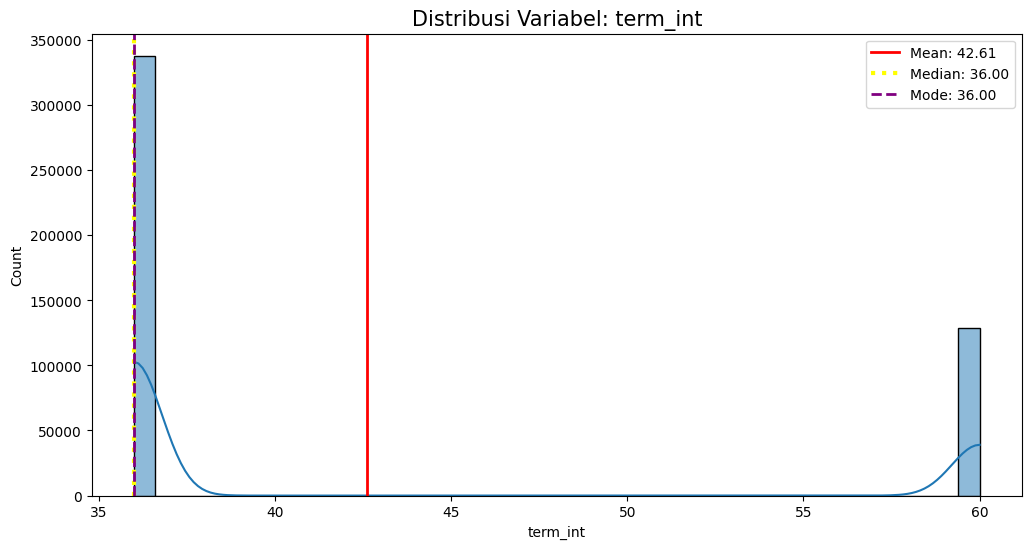

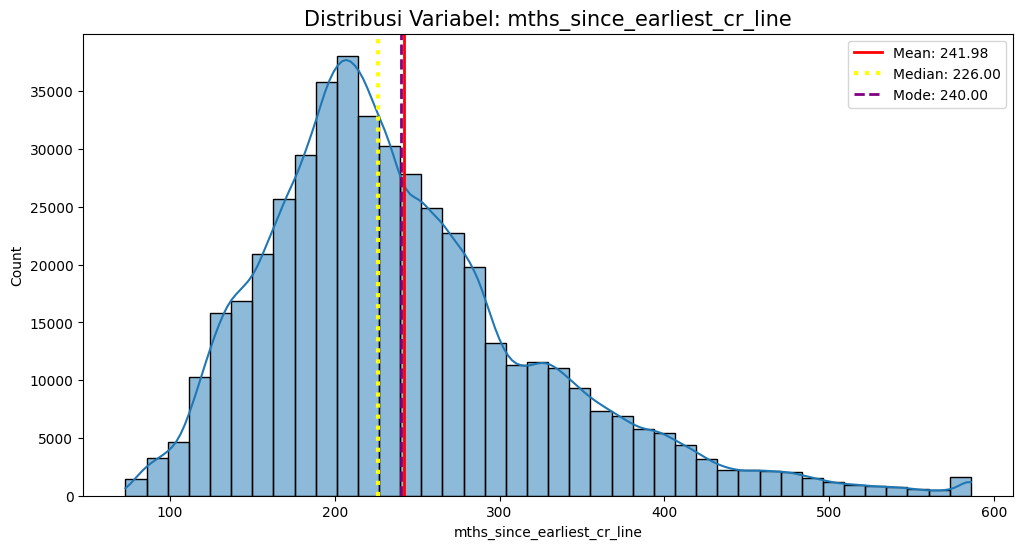

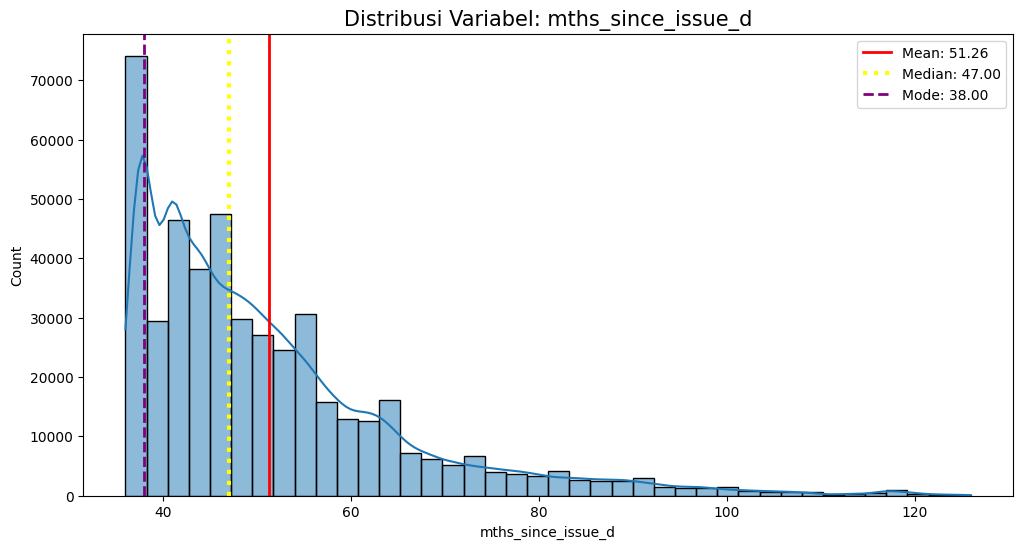

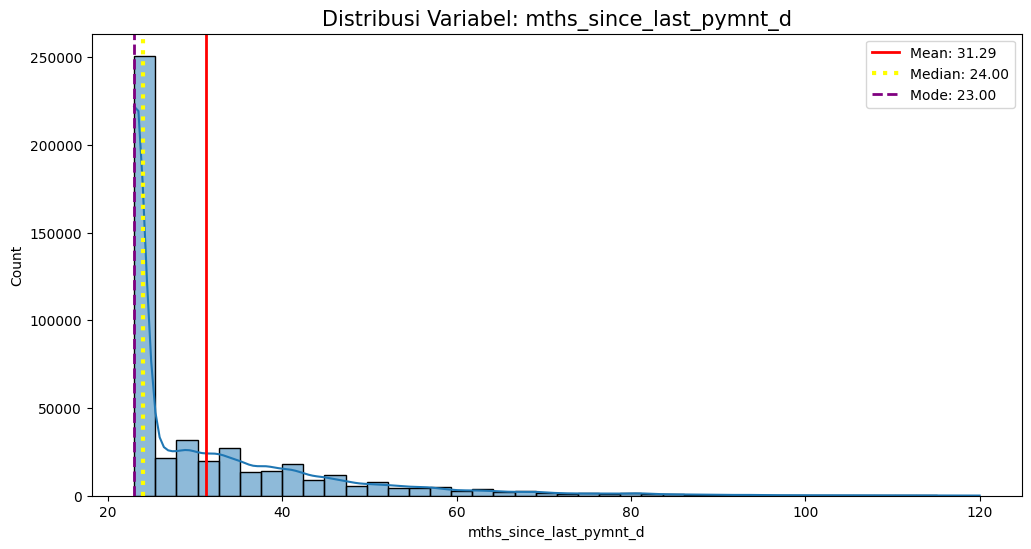

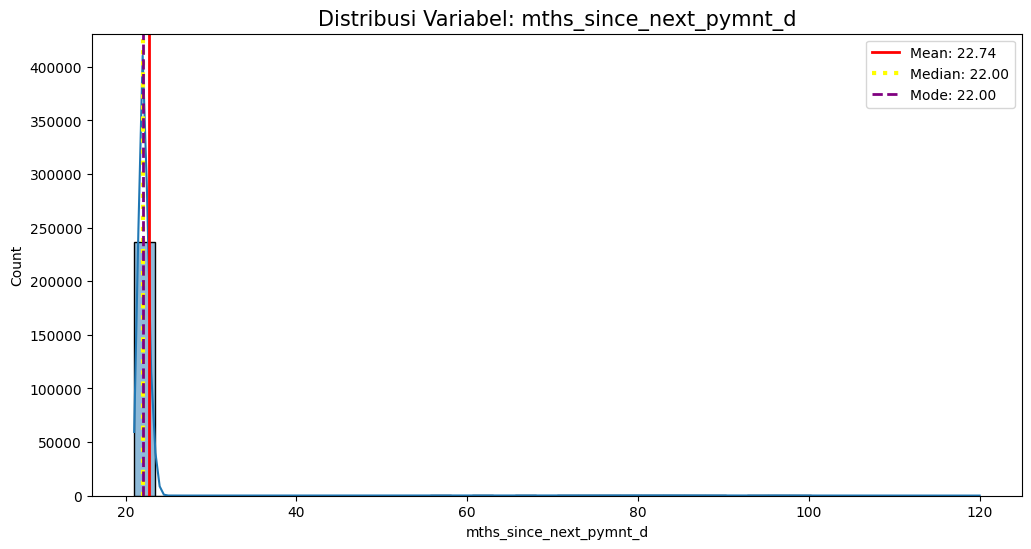

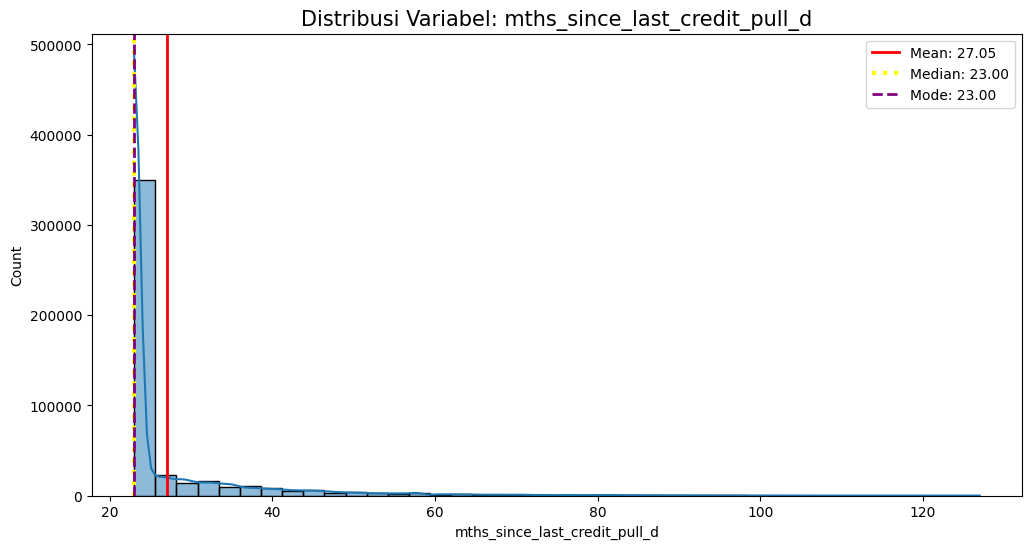

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# Loop melalui setiap nama kolom di dalam list num_var
for column in num_var:
    mean_val = data[column].mean()
    median_val = data[column].median()
    mode_val = data[column].mode().values[0]

    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], kde=True, bins=40)

    plt.axvline(mean_val, color='red', linestyle='solid', linewidth=2, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='yellow', linestyle='dotted', linewidth=3, label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='purple', linestyle='dashed', linewidth=2, label=f'Mode: {mode_val:.2f}')

    plt.title(f'Distribusi Variabel: {column}', fontsize=15)
    plt.legend()
    plt.show()

### Bivariate Analysis

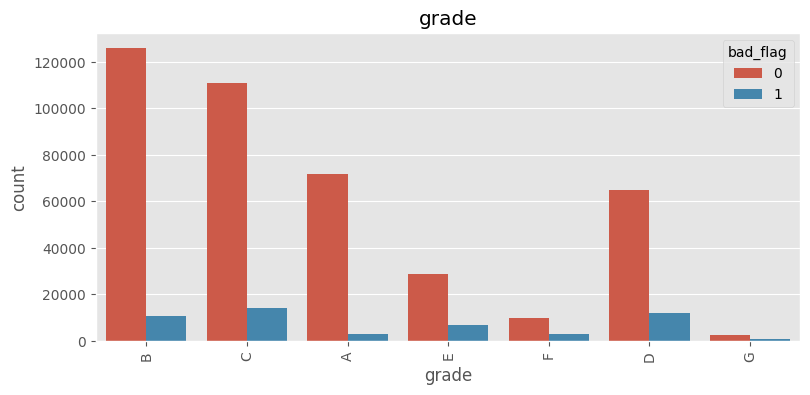

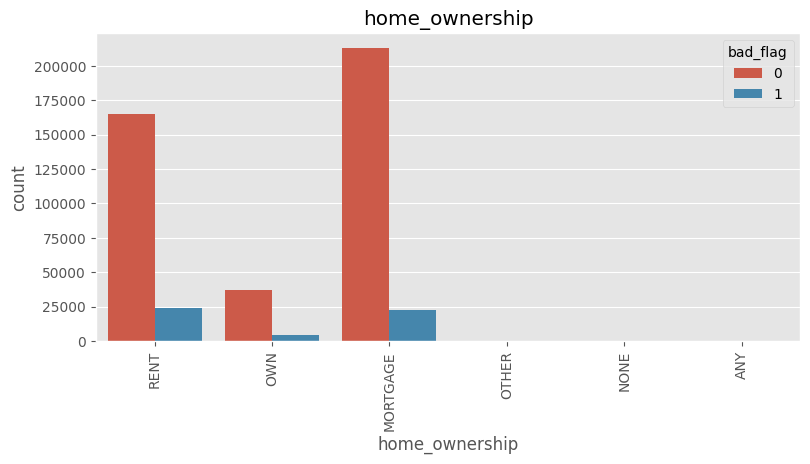

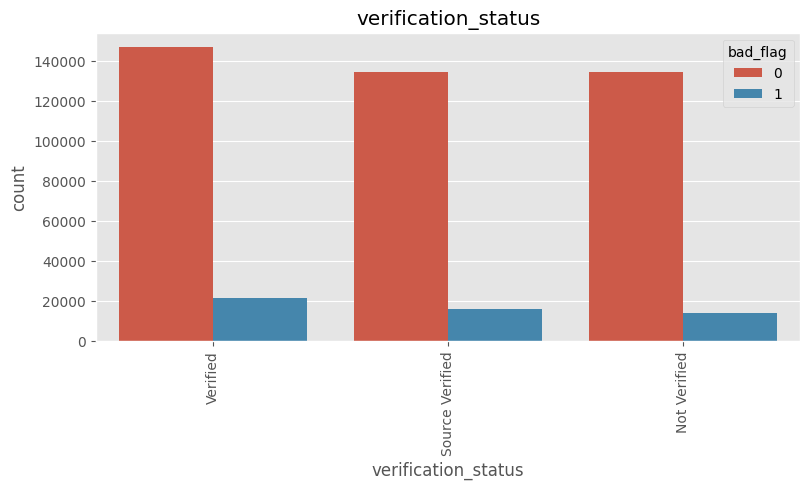

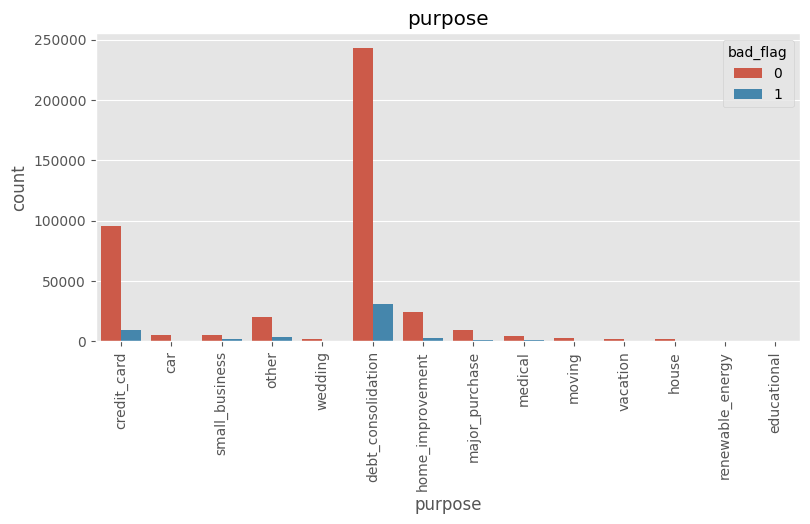

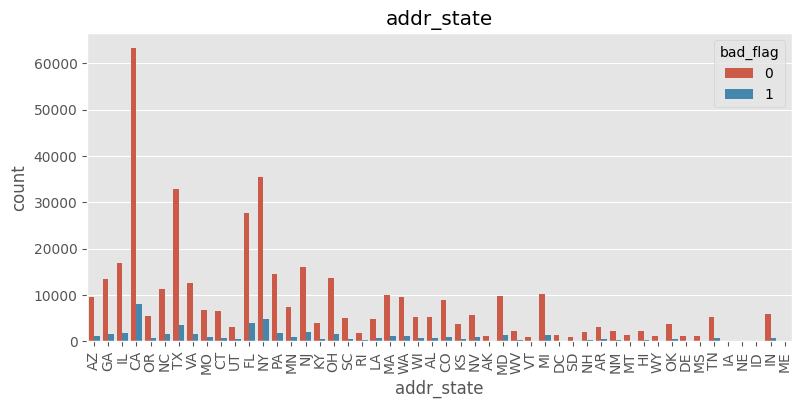

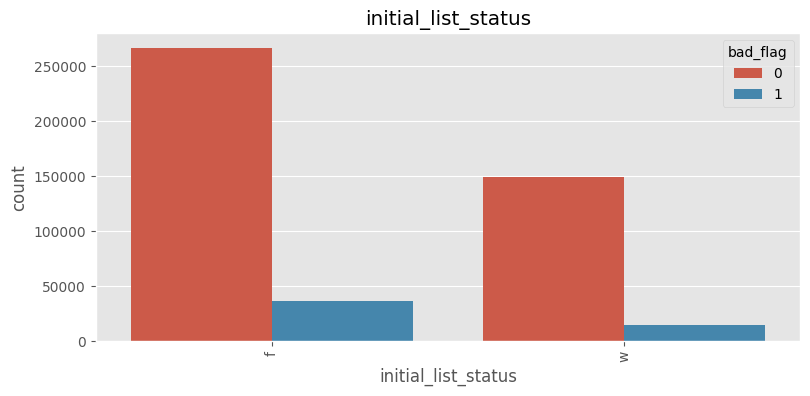

In [62]:
plt.style.use("ggplot")
for column in cat_var:
    plt.figure(figsize=(20, 4))
    plt.subplot(121)
    sns.countplot(x=data[column], hue=data["bad_flag"])
    plt.title(column)
    plt.xticks(rotation=90)

# Data Preprocessing

### Check Missing Values

In [63]:
# Menampilkan presentase data yang hilang
check_missing = data.isnull().sum() * 100 / data.shape[0]
missing_values = check_missing[check_missing > 0].sort_values(ascending=False)
print(missing_values)

mths_since_last_record           86.566585
mths_since_last_delinq           53.690554
mths_since_next_pymnt_d          48.728567
emp_length_int                    4.505399
mths_since_last_pymnt_d           0.080637
revol_util                        0.072917
collections_12_mths_ex_med        0.031097
mths_since_last_credit_pull_d     0.009007
delinq_2yrs                       0.006219
pub_rec                           0.006219
inq_last_6mths                    0.006219
open_acc                          0.006219
acc_now_delinq                    0.006219
total_acc                         0.006219
mths_since_earliest_cr_line       0.006219
annual_inc                        0.000858
dtype: float64


In [64]:
# Menghapus kolom 'mths_since_last_record'
data.drop('mths_since_last_record', axis=1, inplace=True)

### Data Imputation

In [65]:
# Mengecek jumlah NaN di setiap kolom
data.isnull().sum()

,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
int_rate,0
installment,0
grade,0
home_ownership,0
annual_inc,4
verification_status,0
purpose,0


In [66]:
# Melakukan imputasi terhadap kolom yang memiliki nilai NaN

data['annual_inc'].fillna(data['annual_inc'].median(), inplace=True)
data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
data['acc_now_delinq'].fillna(0, inplace=True)
data['total_acc'].fillna(0, inplace=True)
data['pub_rec'].fillna(0, inplace=True)
data['open_acc'].fillna(0, inplace=True)
data['inq_last_6mths'].fillna(0, inplace=True)
data['delinq_2yrs'].fillna(0, inplace=True)
data['collections_12_mths_ex_med'].fillna(0, inplace=True)
data['revol_util'].fillna(0, inplace=True)
data['emp_length_int'].fillna(0, inplace=True)
data['mths_since_last_delinq'].fillna(-1, inplace=True)
data['grade'].fillna('N/A', inplace=True)
data['home_ownership'].fillna('UNKNOWN', inplace=True)
data['verification_status'].fillna('UNKNOWN', inplace=True)
data['purpose'].fillna('UNKNOWN', inplace=True)
data['addr_state'].fillna('UNKNOWN', inplace=True)
data['dti'].fillna(data['dti'].median(), inplace=True)
data['term_int'].fillna(0, inplace=True)
data['mths_since_issue_d'].fillna(0, inplace=True)
data['mths_since_last_pymnt_d'].fillna(-1, inplace=True)
data['mths_since_next_pymnt_d'].fillna(-1, inplace=True)
data['mths_since_last_credit_pull_d'].fillna(0, inplace=True)

### Label Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for column in cat_var:
  data[column] = label.fit_transform(data[column])

### Handling Imbalanced Data

In [68]:
# Menangani imbalance data dengan random oversampling

from imblearn.over_sampling import RandomOverSampler

X = data.drop('bad_flag', axis=1)
y = data['bad_flag']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [69]:
# Mengecek distribusi kelas setelah resampling
y_resampled.value_counts()

,count
bad_flag,
0,415317
1,415317


### Train Test Split

In [70]:
from sklearn.model_selection import train_test_split

# Membagi train set dan test set dengan proporsi 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 664507
Jumlah data uji: 166127


### Standardization

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [72]:
# Menampilkan lima baris teratas dari X_train
X_train_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,-0.652798,-0.650048,-0.634264,-0.697575,-0.567234,-0.792005,-1.032935,-0.155469,-1.321295,-0.701240,...,-0.377340,-0.084517,-0.058107,0.629449,-0.670697,0.880981,-0.790670,-0.823948,1.063987,-0.513236
1,-0.292376,-0.288889,-0.274688,-0.028726,-0.091174,-0.065541,-1.032935,-0.195239,-0.106445,-0.309121,...,-0.350803,-0.084517,-0.058107,1.178187,-0.670697,0.610276,-0.657010,-0.823948,1.063987,-0.513236
2,0.428466,0.433427,0.438470,-0.816932,0.631426,-0.792005,1.038155,0.262119,1.108405,-0.309121,...,-0.310524,-0.084517,-0.058107,0.080711,-0.670697,-0.519624,0.278612,0.812473,-0.672076,-0.513236
3,-1.073289,-1.071399,-1.053768,-0.850712,-1.047876,-0.792005,-1.032935,0.110992,-1.321295,-0.309121,...,-0.404131,-0.084517,-0.058107,1.178187,-0.670697,0.163024,-0.723840,-0.823948,1.063987,-0.513236
4,-0.484601,-0.481507,-0.466462,-1.075914,-0.411725,-0.792005,1.038155,-0.493516,-1.321295,-0.701240,...,-0.368671,-0.084517,-0.058107,-1.291135,-0.670697,-0.484314,-0.189199,0.062446,-0.672076,0.116958


In [73]:
# Menampilkan lima baris teratas dari X_test
X_test_scaled.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,home_ownership,annual_inc,verification_status,purpose,...,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,emp_length_int,term_int,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_next_pymnt_d,mths_since_last_credit_pull_d
0,1.029167,1.035358,1.043755,0.950901,0.656014,1.387387,-1.032935,-0.195239,-0.106445,-0.309121,...,-0.309153,9.892801,-0.058107,-1.016766,1.490986,-0.543163,-0.924330,-0.483027,-0.672076,-0.513236
1,-0.652798,-0.650048,-0.634264,0.232508,-0.493550,-0.065541,-1.032935,0.103038,-1.321295,-0.309121,...,-0.373232,-0.084517,-0.058107,1.178187,-0.670697,1.634248,0.679593,1.562499,-0.672076,2.097566
2,0.068045,0.072269,0.084887,0.784252,0.441877,0.660923,1.038155,-0.334435,-1.321295,-0.309121,...,-0.321090,-0.084517,-0.058107,-1.291135,-0.670697,-1.178732,0.011291,0.403367,-0.672076,-0.423208
3,0.380410,0.385273,0.396519,0.563554,0.015567,-0.065541,-1.032935,0.301889,1.108405,-0.309121,...,-0.344860,-0.084517,-0.058107,-1.291135,1.490986,-0.154760,0.345442,0.062446,-0.672076,0.206986
4,-1.133359,-1.131592,-1.113698,-0.850712,-1.114850,-0.792005,1.038155,-0.294665,-1.321295,-0.701240,...,-0.407865,-0.084517,-0.058107,-1.291135,-0.670697,-0.142991,-0.991161,-0.823948,1.063987,-0.513236


# Data Modelling

### Logistic Regression

In [74]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X_train_scaled, y_train)

LogisticRegression()

### ROC Curve

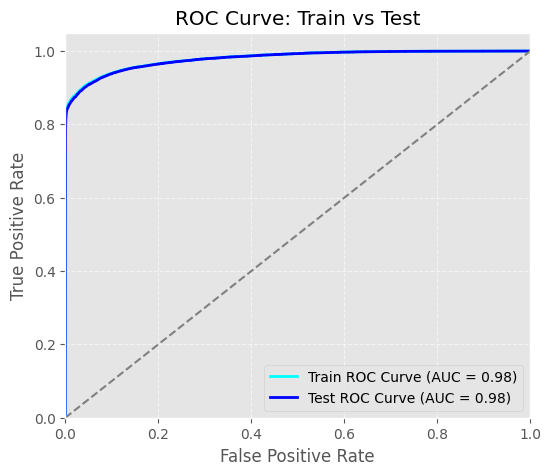

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_train_logreg = logreg_model.predict_proba(X_train_scaled)[:, 1]
y_prob_test_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]

fpr_train, tpr_train, _ = roc_curve(y_train, y_prob_train_logreg)
roc_auc_train = roc_auc_score(y_train, y_prob_train_logreg)

fpr_test, tpr_test, _ = roc_curve(y_test, y_prob_test_logreg)
roc_auc_test = roc_auc_score(y_test, y_prob_test_logreg)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train, tpr_train, color='cyan', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Train vs Test')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Confusion Matrix

Confusion Matrix for Logistic Regression:
[[81815  1292]
 [11053 71967]]


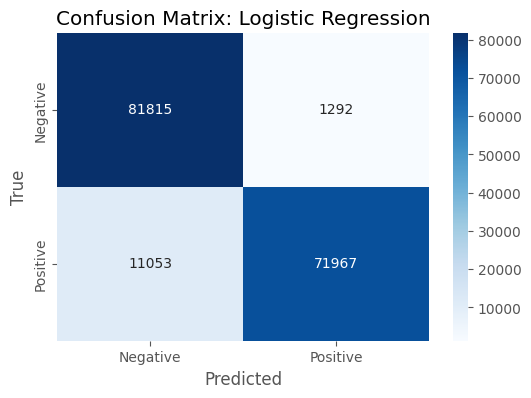


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     83107
           1       0.98      0.87      0.92     83020

    accuracy                           0.93    166127
   macro avg       0.93      0.93      0.93    166127
weighted avg       0.93      0.93      0.93    166127



In [76]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_test_pred_logreg = logreg_model.predict(X_test_scaled)

cm_logreg = confusion_matrix(y_test, y_test_pred_logreg)
print("Confusion Matrix for Logistic Regression:")
print(cm_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report for Logistic Regression:")
print(classification_report(y_test, y_test_pred_logreg))

### LightGBM

In [77]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1)
lgb_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Number of positive: 332297, number of negative: 332210
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.274018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5864
[LightGBM] [Info] Number of data points in the train set: 664507, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500065 -> initscore=0.000262
[LightGBM] [Info] Start training from score 0.000262
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

LGBMClassifier(max_depth=5, random_state=42)

### ROC Curve

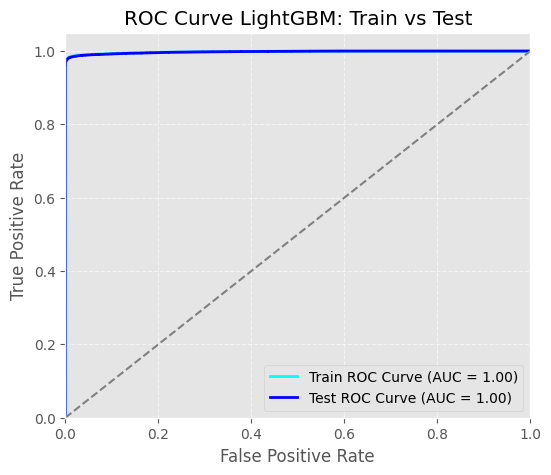

In [78]:
y_prob_train_lgb = lgb_model.predict_proba(X_train_scaled)[:, 1]
y_prob_test_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]

fpr_train_lgb, tpr_train_lgb, _ = roc_curve(y_train, y_prob_train_lgb)
roc_auc_train_lgb = roc_auc_score(y_train, y_prob_train_lgb)

fpr_test_lgb, tpr_test_lgb, _ = roc_curve(y_test, y_prob_test_lgb)
roc_auc_test_lgb = roc_auc_score(y_test, y_prob_test_lgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train_lgb, tpr_train_lgb, color='cyan', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train_lgb:.2f})')
plt.plot(fpr_test_lgb, tpr_test_lgb, color='blue', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test_lgb:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve LightGBM: Train vs Test')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Confusion Matrix

Confusion Matrix for LightGBM:
[[82763   344]
 [ 1908 81112]]


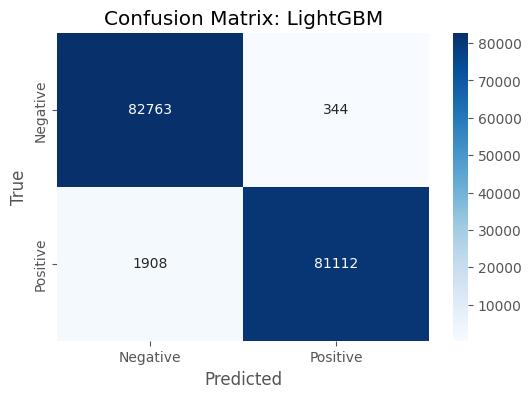


Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83107
           1       1.00      0.98      0.99     83020

    accuracy                           0.99    166127
   macro avg       0.99      0.99      0.99    166127
weighted avg       0.99      0.99      0.99    166127



In [79]:
y_train_pred_lgb = lgb_model.predict(X_train_scaled)
y_test_pred_lgb = lgb_model.predict(X_test_scaled)

cm_lgb = confusion_matrix(y_test, y_test_pred_lgb)
print("Confusion Matrix for LightGBM:")
print(cm_lgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix: LightGBM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report for LightGBM:")
print(classification_report(y_test, y_test_pred_lgb))

### XGBoost

In [80]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, max_depth=5, learning_rate=0.1)
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

### ROC Curve

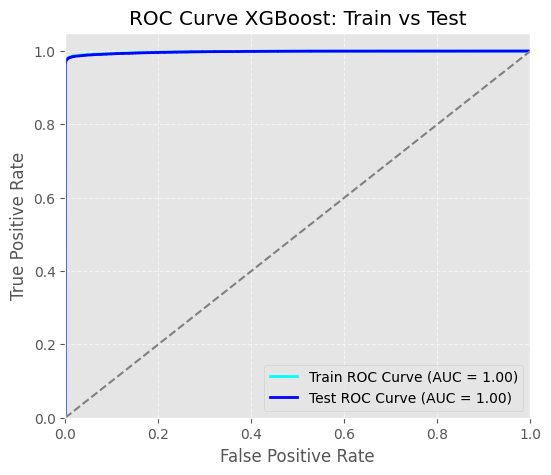

In [81]:
y_prob_train_xgb = xgb_model.predict_proba(X_train_scaled)[:, 1]
y_prob_test_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

fpr_train_xgb, tpr_train_xgb, _ = roc_curve(y_train, y_prob_train_xgb)
roc_auc_train_xgb = roc_auc_score(y_train, y_prob_train_xgb)

fpr_test_xgb, tpr_test_xgb, _ = roc_curve(y_test, y_prob_test_xgb)
roc_auc_test_xgb = roc_auc_score(y_test, y_prob_test_xgb)

plt.figure(figsize=(6, 5))
plt.plot(fpr_train_xgb, tpr_train_xgb, color='cyan', lw=2, label=f'Train ROC Curve (AUC = {roc_auc_train_xgb:.2f})')
plt.plot(fpr_test_xgb, tpr_test_xgb, color='blue', lw=2, label=f'Test ROC Curve (AUC = {roc_auc_test_xgb:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve XGBoost: Train vs Test')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### Confusion Matrix

Confusion Matrix for XGBoost:
[[82794   313]
 [ 1898 81122]]


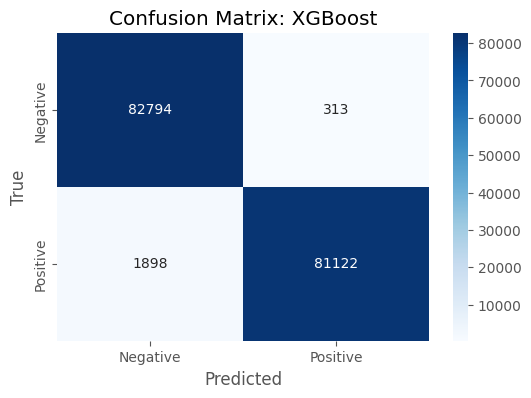


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     83107
           1       1.00      0.98      0.99     83020

    accuracy                           0.99    166127
   macro avg       0.99      0.99      0.99    166127
weighted avg       0.99      0.99      0.99    166127



In [82]:
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)
print("Confusion Matrix for XGBoost:")
print(cm_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix: XGBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_test_pred_xgb))